### Lending Club - Part 2 - Exploratory Data Analysis and Data Preprocessing

Project Goals:
1. At loan origination: is my model able to predict if a customer will fully pay off their debt or will they incur a charge off
2. Multiclassification exercise: the objective of the second part is to get experience with multiclassification.

In this section, we will do exploratory data analysis to learn more about the dataset we are working with. We will also perform feature engineering to make better sense of the feature space we will be training on. In addition, we will also deal with missing or incomplete data in this section.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
feat_list = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
             'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
             'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
             'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'funded_amnt_inv',
             'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'total_pymnt', 'last_fico_range_high',
             'last_fico_range_low', 'open_il_12m']

In [4]:
df = pd.read_csv('./DATA/accepted_2007_to_2018Q4.csv', usecols=feat_list)

In [5]:
data_info = pd.read_csv('./DATA/Lending Club Data Dictionary Approved.csv',index_col='LoanStatNew', encoding = "ISO-8859-1")

In [6]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [7]:
df

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,revol_util,total_acc,initial_list_status,total_pymnt,last_fico_range_high,last_fico_range_low,application_type,open_il_12m,mort_acc,pub_rec_bankruptcies
0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,...,29.7,13.0,w,4421.723917,564.0,560.0,Individual,0.0,1.0,0.0
1,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,...,19.2,38.0,w,25679.660000,699.0,695.0,Individual,0.0,4.0,0.0
2,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,...,56.2,18.0,w,22705.924294,704.0,700.0,Joint App,0.0,5.0,0.0
3,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,...,11.6,17.0,w,31464.010000,679.0,675.0,Individual,0.0,1.0,0.0
4,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,...,64.5,35.0,w,11740.500000,704.0,700.0,Individual,0.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,40000.0,40000.0,60 months,10.49,859.56,B,B3,Vice President,9 years,MORTGAGE,...,64.9,37.0,f,24903.930000,724.0,720.0,Individual,0.0,3.0,0.0
2260697,24000.0,24000.0,60 months,14.49,564.56,C,C4,Program Manager,6 years,RENT,...,68.1,31.0,f,6755.400000,594.0,590.0,Individual,0.0,2.0,1.0
2260698,14000.0,14000.0,60 months,14.49,329.33,C,C4,Customer Service Technician,10+ years,MORTGAGE,...,54.0,22.0,w,9621.250000,669.0,665.0,Individual,1.0,1.0,0.0
2260699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 36 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   funded_amnt_inv       float64
 2   term                  object 
 3   int_rate              float64
 4   installment           float64
 5   grade                 object 
 6   sub_grade             object 
 7   emp_title             object 
 8   emp_length            object 
 9   home_ownership        object 
 10  annual_inc            float64
 11  verification_status   object 
 12  issue_d               object 
 13  loan_status           object 
 14  purpose               object 
 15  title                 object 
 16  zip_code              object 
 17  addr_state            object 
 18  dti                   float64
 19  delinq_2yrs           float64
 20  earliest_cr_line      object 
 21  fico_range_low        float64
 22  fico_range_high       float64
 23  open_ac

In [12]:
df.isnull().sum()

loan_amnt                   33
funded_amnt_inv             33
term                        33
int_rate                    33
installment                 33
grade                       33
sub_grade                   33
emp_title               167002
emp_length              146940
home_ownership              33
annual_inc                  37
verification_status         33
issue_d                     33
loan_status                 33
purpose                     33
title                    23358
zip_code                    34
addr_state                  33
dti                       1744
delinq_2yrs                 62
earliest_cr_line            62
fico_range_low              33
fico_range_high             33
open_acc                    62
pub_rec                     62
revol_bal                   33
revol_util                1835
total_acc                   62
initial_list_status         33
total_pymnt                 33
last_fico_range_high        33
last_fico_range_low         33
applicat

We seem to have a lot of columns with 33 rows with missing data. Let's drop those rows.

In [13]:
len(df)

2260701

In [14]:
index = df[df['loan_amnt'].isnull()].index

In [15]:
df = df.drop(index, axis=0)

In [16]:
df.isnull().sum()

loan_amnt                    0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_title               166969
emp_length              146907
home_ownership               0
annual_inc                   4
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
title                    23325
zip_code                     1
addr_state                   0
dti                       1711
delinq_2yrs                 29
earliest_cr_line            29
fico_range_low               0
fico_range_high              0
open_acc                    29
pub_rec                     29
revol_bal                    0
revol_util                1802
total_acc                   29
initial_list_status          0
total_pymnt                  0
last_fico_range_high         0
last_fico_range_low          0
applicat

We have a few attributes with 29 missing values. Let's drop those as well.

In [17]:
index = df[df['delinq_2yrs'].isnull()].index

In [18]:
df = df.drop(index, axis=0)

In [19]:
df.isnull().sum()

loan_amnt                    0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_title               166957
emp_length              146907
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
title                    23325
zip_code                     1
addr_state                   0
dti                       1711
delinq_2yrs                  0
earliest_cr_line             0
fico_range_low               0
fico_range_high              0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                1773
total_acc                    0
initial_list_status          0
total_pymnt                  0
last_fico_range_high         0
last_fico_range_low          0
applicat

One row under zipcode with a missing value. Let's take care of that too

In [16]:
index = df[df['zip_code'].isnull()].index

In [17]:
df = df.drop(index, axis=0)

In [18]:
df.isnull().sum()

loan_amnt                    0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_title               166957
emp_length              146907
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
title                    23325
zip_code                     0
addr_state                   0
dti                       1711
delinq_2yrs                  0
earliest_cr_line             0
fico_range_low               0
fico_range_high              0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                1773
total_acc                    0
initial_list_status          0
total_pymnt                  0
last_fico_range_high         0
last_fico_range_low          0
applicat

In [22]:
df.isnull().sum()/len(df)

loan_amnt               0.000000e+00
funded_amnt_inv         0.000000e+00
term                    0.000000e+00
int_rate                0.000000e+00
installment             0.000000e+00
grade                   0.000000e+00
sub_grade               0.000000e+00
emp_title               7.385390e-02
emp_length              6.498472e-02
home_ownership          0.000000e+00
annual_inc              0.000000e+00
verification_status     0.000000e+00
issue_d                 0.000000e+00
loan_status             0.000000e+00
purpose                 0.000000e+00
title                   1.031788e-02
zip_code                4.423528e-07
addr_state              0.000000e+00
dti                     7.568656e-04
delinq_2yrs             0.000000e+00
earliest_cr_line        0.000000e+00
fico_range_low          0.000000e+00
fico_range_high         0.000000e+00
open_acc                0.000000e+00
pub_rec                 0.000000e+00
revol_bal               0.000000e+00
revol_util              7.842915e-04
t

In [23]:
feat_info('open_il_12m')

Number of installment accounts opened in past 12 months


'open_il_12m' feature have 38 % missing values. Since it has so many missing values and this is not a feature that domain knowledge of other features could replace the missing values with some kind of mean or with some kind of relationship, it is best we just drop this feature entirely

In [24]:
df = df.drop('open_il_12m', axis=1)

In [25]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [26]:
df['emp_title'].unique()

array(['leadman', 'Engineer', 'truck driver', ..., 'Sr. Photo Producer',
       'Exec Dir Internal Audit', 'Current Operations Officer'],
      dtype=object)

In [27]:
len(df['emp_title'].unique())

512682

There are simply way too many employment titles to create dummy variables for. We will drop this column.

In [28]:
df = df.drop('emp_title', axis=1)

In [29]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [30]:
df['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '1 year', '7 years',
       '8 years', '5 years', '2 years', '9 years', '< 1 year', nan],
      dtype=object)

''

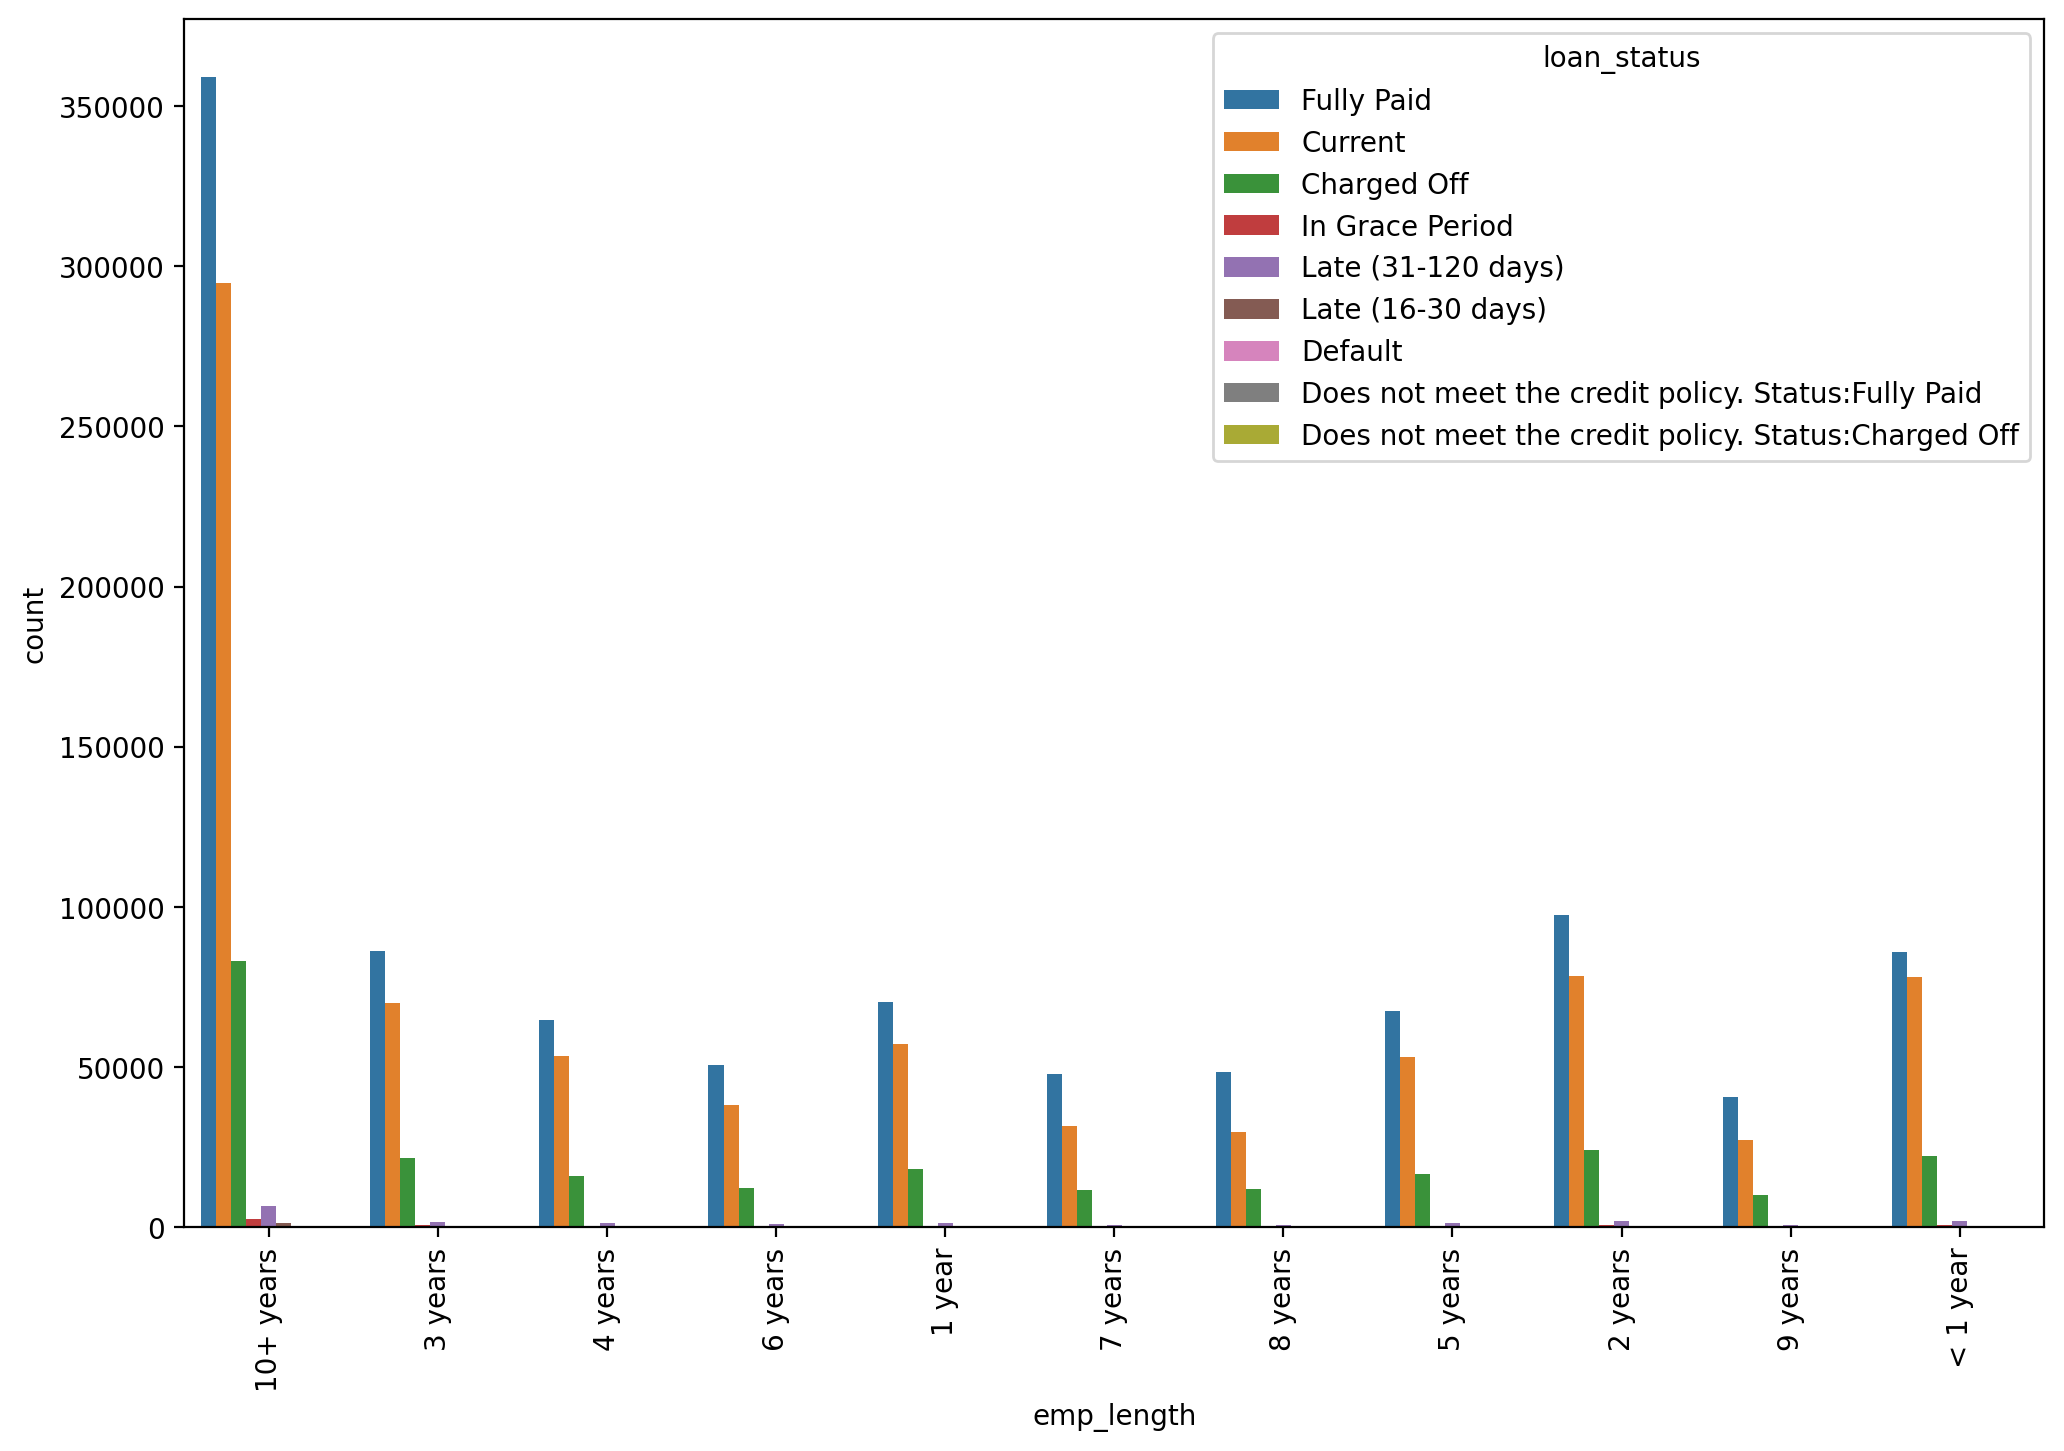

In [31]:
plt.figure(figsize=(12,8), dpi=200)
sns.countplot(data=df, x='emp_length', hue='loan_status')
plt.xticks(rotation=90)
;

Let's work on the loan status and engineer the label column into labels we want to predict and then circle back to employment length

In [30]:
df['loan_status'].value_counts()

Fully Paid                                             1076750
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1962
Does not meet the credit policy. Status:Charged Off        758
Default                                                     40
Name: loan_status, dtype: int64

**Does not meet the credit policy**

https://www.lendacademy.com/policy-code-2-loans-lending-club/

These are loans made to borrowers that do not meet Lending Club’s current credit policy standards.
The FICO scores on these borrowers are typically 640-659, below the 660 threshold on Policy Code 1 loans.
These loans are made available to select institutional investors who have a great deal of experience with consumer loans in this credit spectrum and with Lending Club.
They are only available as whole loans at this time.
Lending Club believes that Policy 2 loans could grow to a total of 15% of the total volume over the next 12 months.

We are interested in being able to predict if a client will be able to pay off his loan completely, will a charge off occur or if the customer is currently a client(see project objective at the top).
Hence, there are a few labels that are not part of our investigation. We will remove this labels from our dataset.

In [32]:
labels = ['Fully Paid', 'Charged Off', 'Current']

In [33]:
df[df['loan_status'].isin(labels)]['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off'], dtype=object)

In [34]:
df = df[df['loan_status'].isin(labels)]

In [35]:
len(df)

2223627

In [36]:
df.isnull().sum()

loan_amnt                    0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length              143981
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
title                    22870
zip_code                     1
addr_state                   0
dti                       1673
delinq_2yrs                  0
earliest_cr_line             0
fico_range_low               0
fico_range_high              0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                1724
total_acc                    0
initial_list_status          0
total_pymnt                  0
last_fico_range_high         0
last_fico_range_low          0
application_type             0
mort_acc

Circling back to employment length

In [37]:
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years' ]

''

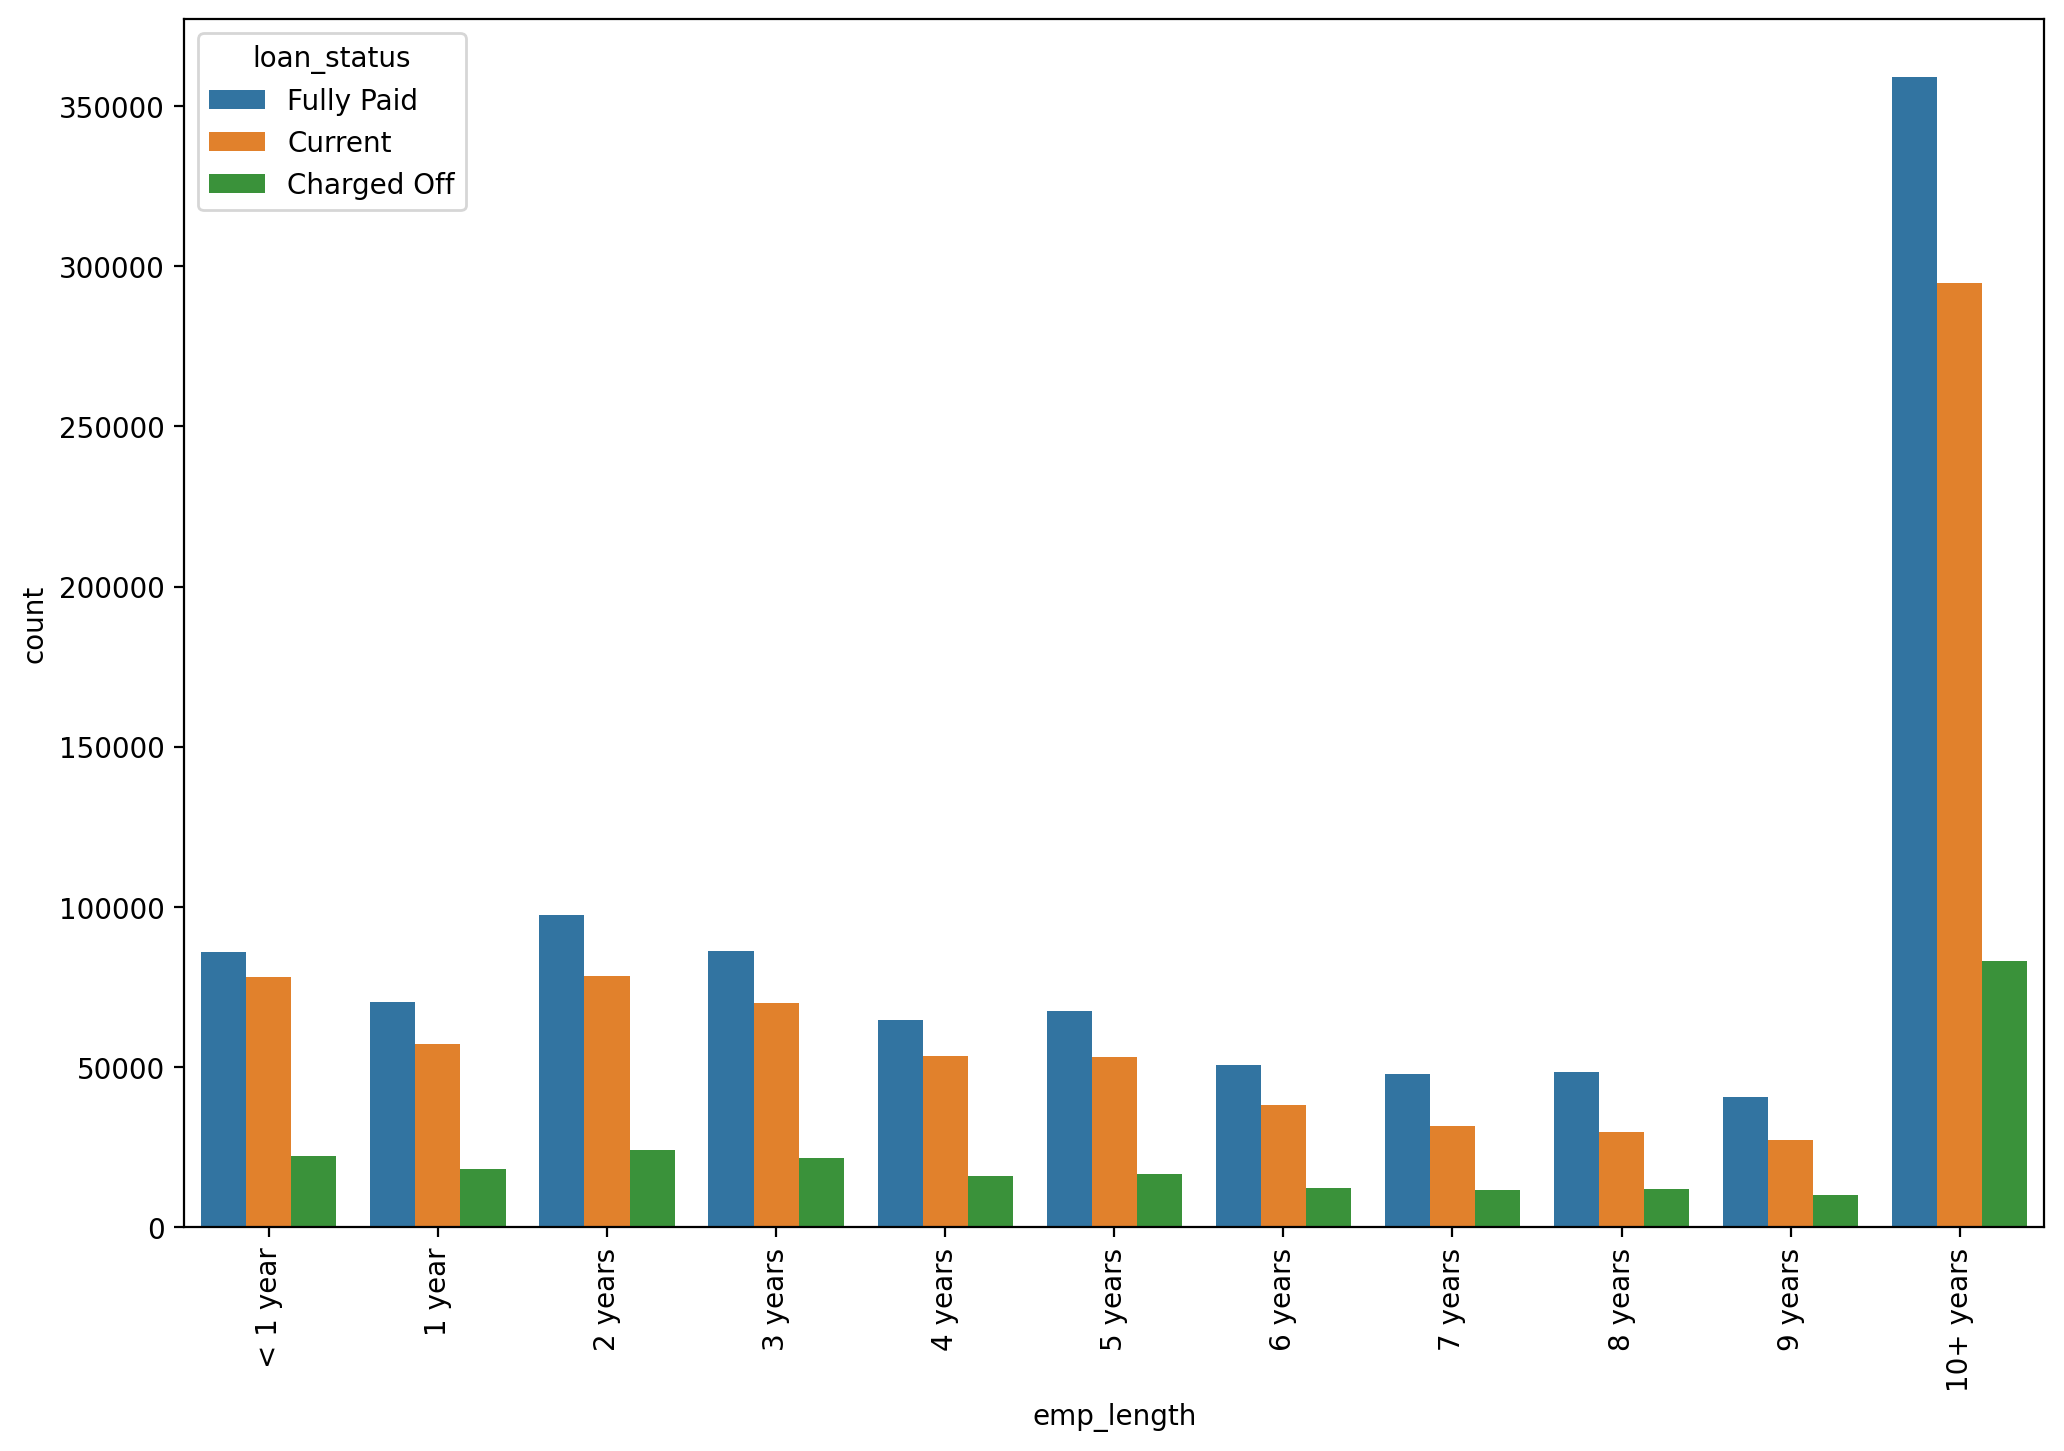

In [38]:
plt.figure(figsize=(12,8), dpi=200)
sns.countplot(data=df, x='emp_length', hue='loan_status', order=order)
plt.xticks(rotation=90)
;

This doesn't really tell us anything useful. It doesn't show a relationship between length of employment and how it affects charge off

Let's do some feature engineering to convert this such that for each time interval, we see the charge off as a percentage of each interval

In [40]:
df['emp_length']

0          10+ years
1          10+ years
2          10+ years
3          10+ years
4            3 years
             ...    
2260694      7 years
2260695    10+ years
2260696      9 years
2260697      6 years
2260698    10+ years
Name: emp_length, Length: 2223627, dtype: object

In [41]:
df[df['loan_status'] == 'Charged Off']['emp_length'].value_counts()

10+ years    83057
2 years      24114
< 1 year     22182
3 years      21486
1 year       18198
5 years      16495
4 years      15900
6 years      12140
8 years      12100
7 years      11620
9 years      10137
Name: emp_length, dtype: int64

In [42]:
df['emp_length'].value_counts()

10+ years    736923
2 years      200174
< 1 year     186281
3 years      177666
1 year       145767
5 years      137400
4 years      134186
6 years      100984
7 years       91392
8 years       90572
9 years       78301
Name: emp_length, dtype: int64

In [43]:
df[df['loan_status'] == 'Charged Off']['emp_length'].value_counts() / df['emp_length'].value_counts()

1 year       0.124843
10+ years    0.112708
2 years      0.120465
3 years      0.120935
4 years      0.118492
5 years      0.120051
6 years      0.120217
7 years      0.127145
8 years      0.133595
9 years      0.129462
< 1 year     0.119078
Name: emp_length, dtype: float64

In [44]:
Series = df[df['loan_status'] == 'Charged Off']['emp_length'].value_counts() / df['emp_length'].value_counts()

In [45]:
df_Series = pd.DataFrame(data = Series.values, index = Series.index, columns=['% Charged Off'])

In [46]:
df_Series

,% Charged Off
1 year,0.124843
10+ years,0.112708
2 years,0.120465
3 years,0.120935
4 years,0.118492
5 years,0.120051
6 years,0.120217
7 years,0.127145
8 years,0.133595
9 years,0.129462


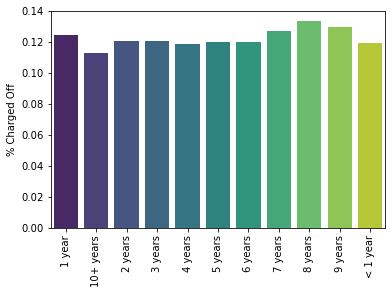

In [47]:
sns.barplot(data=df_Series, x = df_Series.index, y='% Charged Off', palette='viridis')
plt.xticks(rotation=90);

This is not particularly helpful. The % of charged off for each group is roughly the same. This does not tell us anything and because of that, we will drop emp_length column.

In [48]:
df = df.drop('emp_length', axis=1)

In [49]:
df.isnull().sum()

loan_amnt                   0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                   22870
zip_code                    1
addr_state                  0
dti                      1673
delinq_2yrs                 0
earliest_cr_line            0
fico_range_low              0
fico_range_high             0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util               1724
total_acc                   0
initial_list_status         0
total_pymnt                 0
last_fico_range_high        0
last_fico_range_low         0
application_type            0
mort_acc                47281
pub_rec_bankruptcies      697
dtype: int

In [50]:
df['title'].head()

0    Debt consolidation
1              Business
2                   NaN
3    Debt consolidation
4        Major purchase
Name: title, dtype: object

In [51]:
df['title'].unique()

array(['Debt consolidation', 'Business', nan, ..., 'takeitaway',
       'Creditt Card Loan', 'debt reduction/hone updates'], dtype=object)

In [52]:
len(df['title'].unique())

61684

In [53]:
feat_info('title')

The loan title provided by the borrower


In [54]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [55]:
len(df['purpose'].unique())

14

In [56]:
df['purpose'].unique()

array(['debt_consolidation', 'small_business', 'home_improvement',
       'major_purchase', 'credit_card', 'other', 'house', 'vacation',
       'car', 'medical', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

It looks like title is just a subset of purpose where the description of getting the loan is more fine grain. We will drop the title column

In [57]:
df = df.drop('title', axis=1)

In [58]:
df.isnull().sum()

loan_amnt                   0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
zip_code                    1
addr_state                  0
dti                      1673
delinq_2yrs                 0
earliest_cr_line            0
fico_range_low              0
fico_range_high             0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util               1724
total_acc                   0
initial_list_status         0
total_pymnt                 0
last_fico_range_high        0
last_fico_range_low         0
application_type            0
mort_acc                47281
pub_rec_bankruptcies      697
dtype: int64

In [59]:
feat_info('dti')

A ratio calculated using the borrowers total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrowers self-reported monthly income.


dti, revol_util and pub_rec_bankruptcies have so few rows with missing data that we will just drop them

In [60]:
index = df[df['dti'].isnull()].index

In [61]:
df = df.drop(index, axis=0)

In [62]:
df.isnull().sum()

loan_amnt                   0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
zip_code                    1
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
fico_range_low              0
fico_range_high             0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util               1720
total_acc                   0
initial_list_status         0
total_pymnt                 0
last_fico_range_high        0
last_fico_range_low         0
application_type            0
mort_acc                47281
pub_rec_bankruptcies      697
dtype: int64

In [63]:
feat_info('mort_acc')

Number of mortgage accounts.


In [64]:
df.isnull().sum()/len(df)

loan_amnt               0.000000e+00
funded_amnt_inv         0.000000e+00
term                    0.000000e+00
int_rate                0.000000e+00
installment             0.000000e+00
grade                   0.000000e+00
sub_grade               0.000000e+00
home_ownership          0.000000e+00
annual_inc              0.000000e+00
verification_status     0.000000e+00
issue_d                 0.000000e+00
loan_status             0.000000e+00
purpose                 0.000000e+00
zip_code                4.500543e-07
addr_state              0.000000e+00
dti                     0.000000e+00
delinq_2yrs             0.000000e+00
earliest_cr_line        0.000000e+00
fico_range_low          0.000000e+00
fico_range_high         0.000000e+00
open_acc                0.000000e+00
pub_rec                 0.000000e+00
revol_bal               0.000000e+00
revol_util              7.740934e-04
total_acc               0.000000e+00
initial_list_status     0.000000e+00
total_pymnt             0.000000e+00
l

Although the number of missing rows for mort_acc is only 2.12 %, we could drop it but let's try to fill in those values.
We will calculate its correlation between the other features and pick the feature which correlates the most with it and fill it with its mean value

In [65]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.089386
pub_rec                -0.011282
dti                    -0.009933
pub_rec_bankruptcies   -0.008806
revol_util              0.037847
delinq_2yrs             0.074955
last_fico_range_low     0.090074
fico_range_low          0.093161
fico_range_high         0.093162
last_fico_range_high    0.098153
open_acc                0.134240
annual_inc              0.134492
installment             0.185611
revol_bal               0.213223
loan_amnt               0.220048
funded_amnt_inv         0.220053
total_pymnt             0.223305
total_acc               0.367959
mort_acc                1.000000
Name: mort_acc, dtype: float64

It looks like total_acc have the highest correlation with mort_acc

In [66]:
df['mort_acc'] = df.groupby('total_acc')['mort_acc'].apply(lambda value: value.fillna(value.mean()))

In [67]:
df.isnull().sum()

loan_amnt                  0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   1
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
fico_range_low             0
fico_range_high            0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util              1720
total_acc                  0
initial_list_status        0
total_pymnt                0
last_fico_range_high       0
last_fico_range_low        0
application_type           0
mort_acc                   0
pub_rec_bankruptcies     697
dtype: int64

we will just drop the remaining missing rows

In [68]:
df = df.dropna()

In [69]:
df.isnull().sum()

loan_amnt               0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
fico_range_low          0
fico_range_high         0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
total_pymnt             0
last_fico_range_high    0
last_fico_range_low     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

In [70]:
len(df)

2219536

In [71]:
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_pymnt',
       'last_fico_range_high', 'last_fico_range_low', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219536 entries, 0 to 2260698
Data columns (total 32 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   funded_amnt_inv       float64
 2   term                  object 
 3   int_rate              float64
 4   installment           float64
 5   grade                 object 
 6   sub_grade             object 
 7   home_ownership        object 
 8   annual_inc            float64
 9   verification_status   object 
 10  issue_d               object 
 11  loan_status           object 
 12  purpose               object 
 13  zip_code              object 
 14  addr_state            object 
 15  dti                   float64
 16  delinq_2yrs           float64
 17  earliest_cr_line      object 
 18  fico_range_low        float64
 19  fico_range_high       float64
 20  open_acc              float64
 21  pub_rec               float64
 22  revol_bal             float64
 23  revol_u

<AxesSubplot:xlabel='loan_status', ylabel='count'>

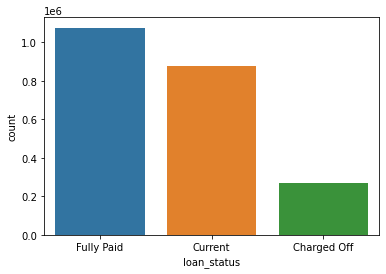

In [73]:
sns.countplot(data=df, x='loan_status')

This is quite an imbalance dataset for objective 1

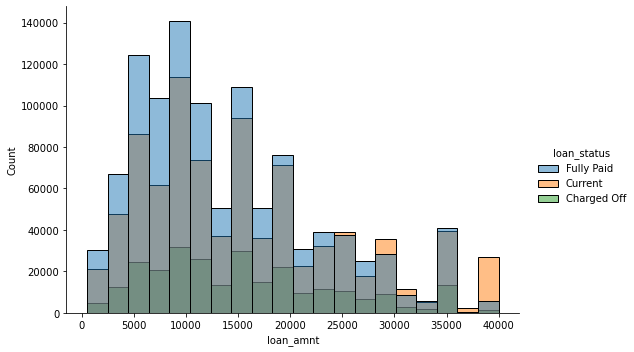

In [74]:
sns.displot(data=df, x='loan_amnt', bins=20, height=5, aspect=1.5, hue='loan_status')

Let's investigate feature correlation relationship with Charged Off

In [75]:
df['label'] = df['loan_status'].map({'Fully Paid': 0, 'Current': 0, 'Charged Off': 1})

In [76]:
df['label']

0          0
1          0
2          0
3          0
4          0
          ..
2260694    0
2260695    0
2260696    0
2260697    1
2260698    0
Name: label, Length: 2219536, dtype: int64

In [77]:
feat_imp = df.corr()['label'].sort_values()[:-1]

In [78]:
feat_imp = pd.DataFrame(data=feat_imp.values, index=feat_imp.index, columns=['importance'])

In [79]:
feat_imp

,importance
last_fico_range_high,-0.614075
last_fico_range_low,-0.567952
total_pymnt,-0.143424
fico_range_low,-0.121721
fico_range_high,-0.121719
mort_acc,-0.036423
annual_inc,-0.025000
revol_bal,-0.021249
total_acc,0.016316
open_acc,0.018847


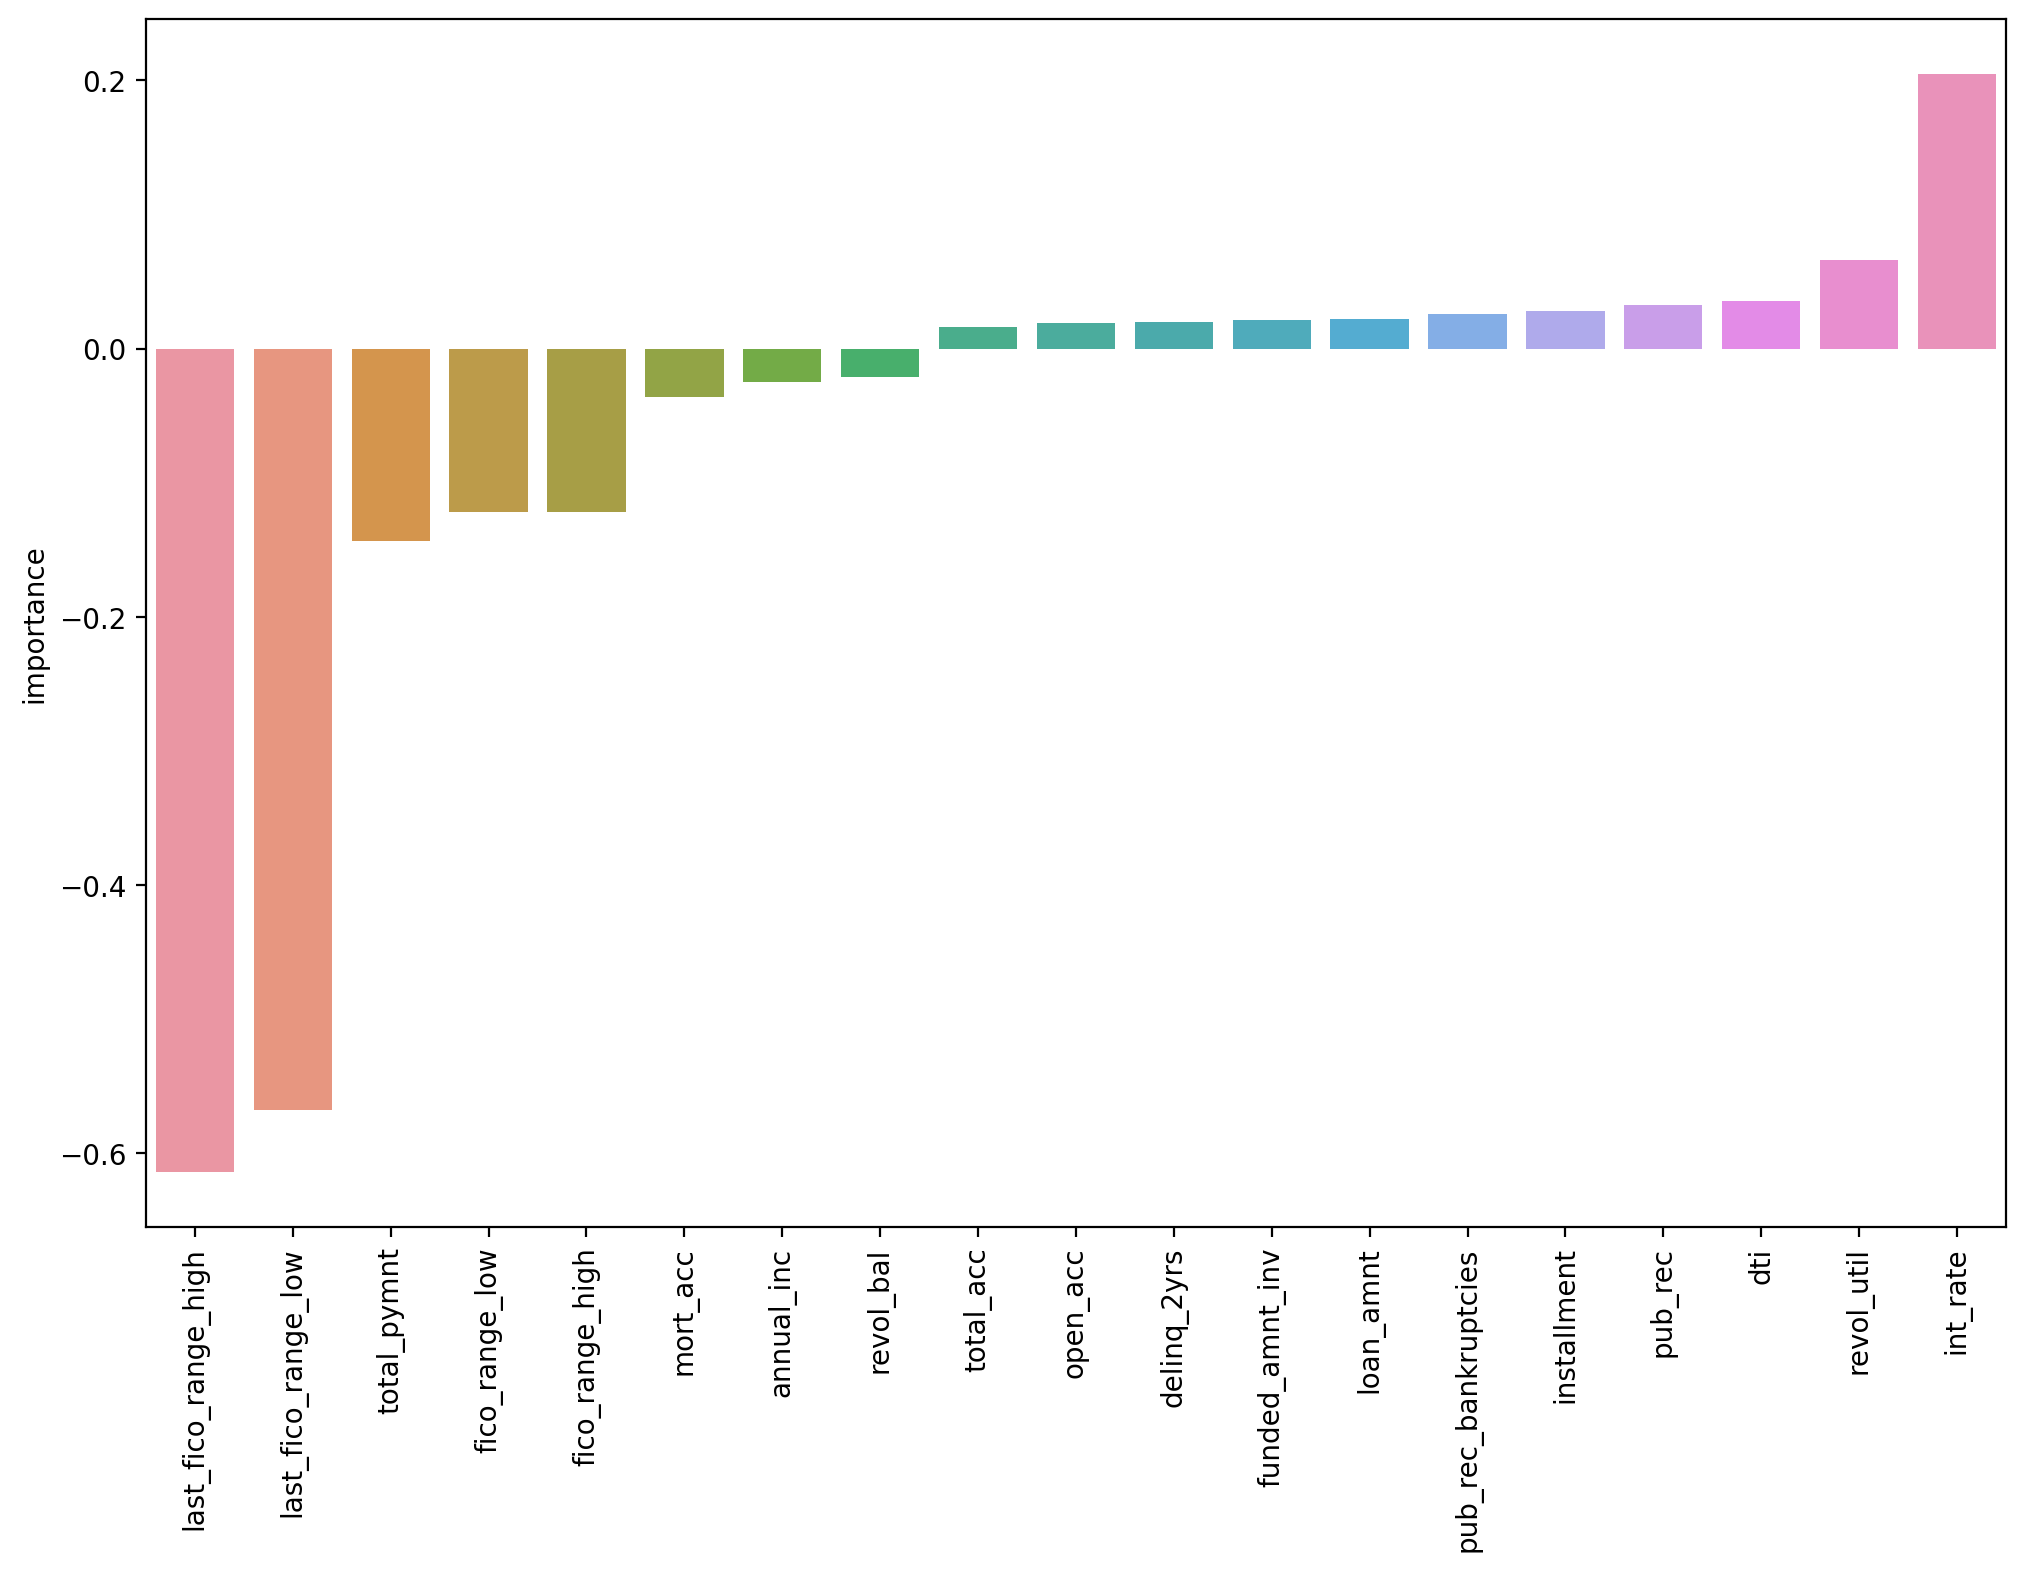

In [80]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(data=feat_imp, x=feat_imp.index, y='importance')
plt.xticks(rotation=90);

As expected, the higher the interest rates, the more likely a customer would experience a charged off and also the higher their fico score would also negatively correlate strongly whether they experience a charged off

In [81]:
feat_info('dti')

A ratio calculated using the borrowers total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrowers self-reported monthly income.


Let's swap the values of loan column to see what are the most important features in determining if the customer will fully repay the loan

In [82]:
df['label'] = df['loan_status'].map({'Fully Paid': 1, 'Current': 0, 'Charged Off': 0})

In [83]:
feat_imp = df.corr()['label'].sort_values()[:-1]

In [84]:
feat_imp = pd.DataFrame(data=feat_imp.values, index=feat_imp.index, columns=['importance'])

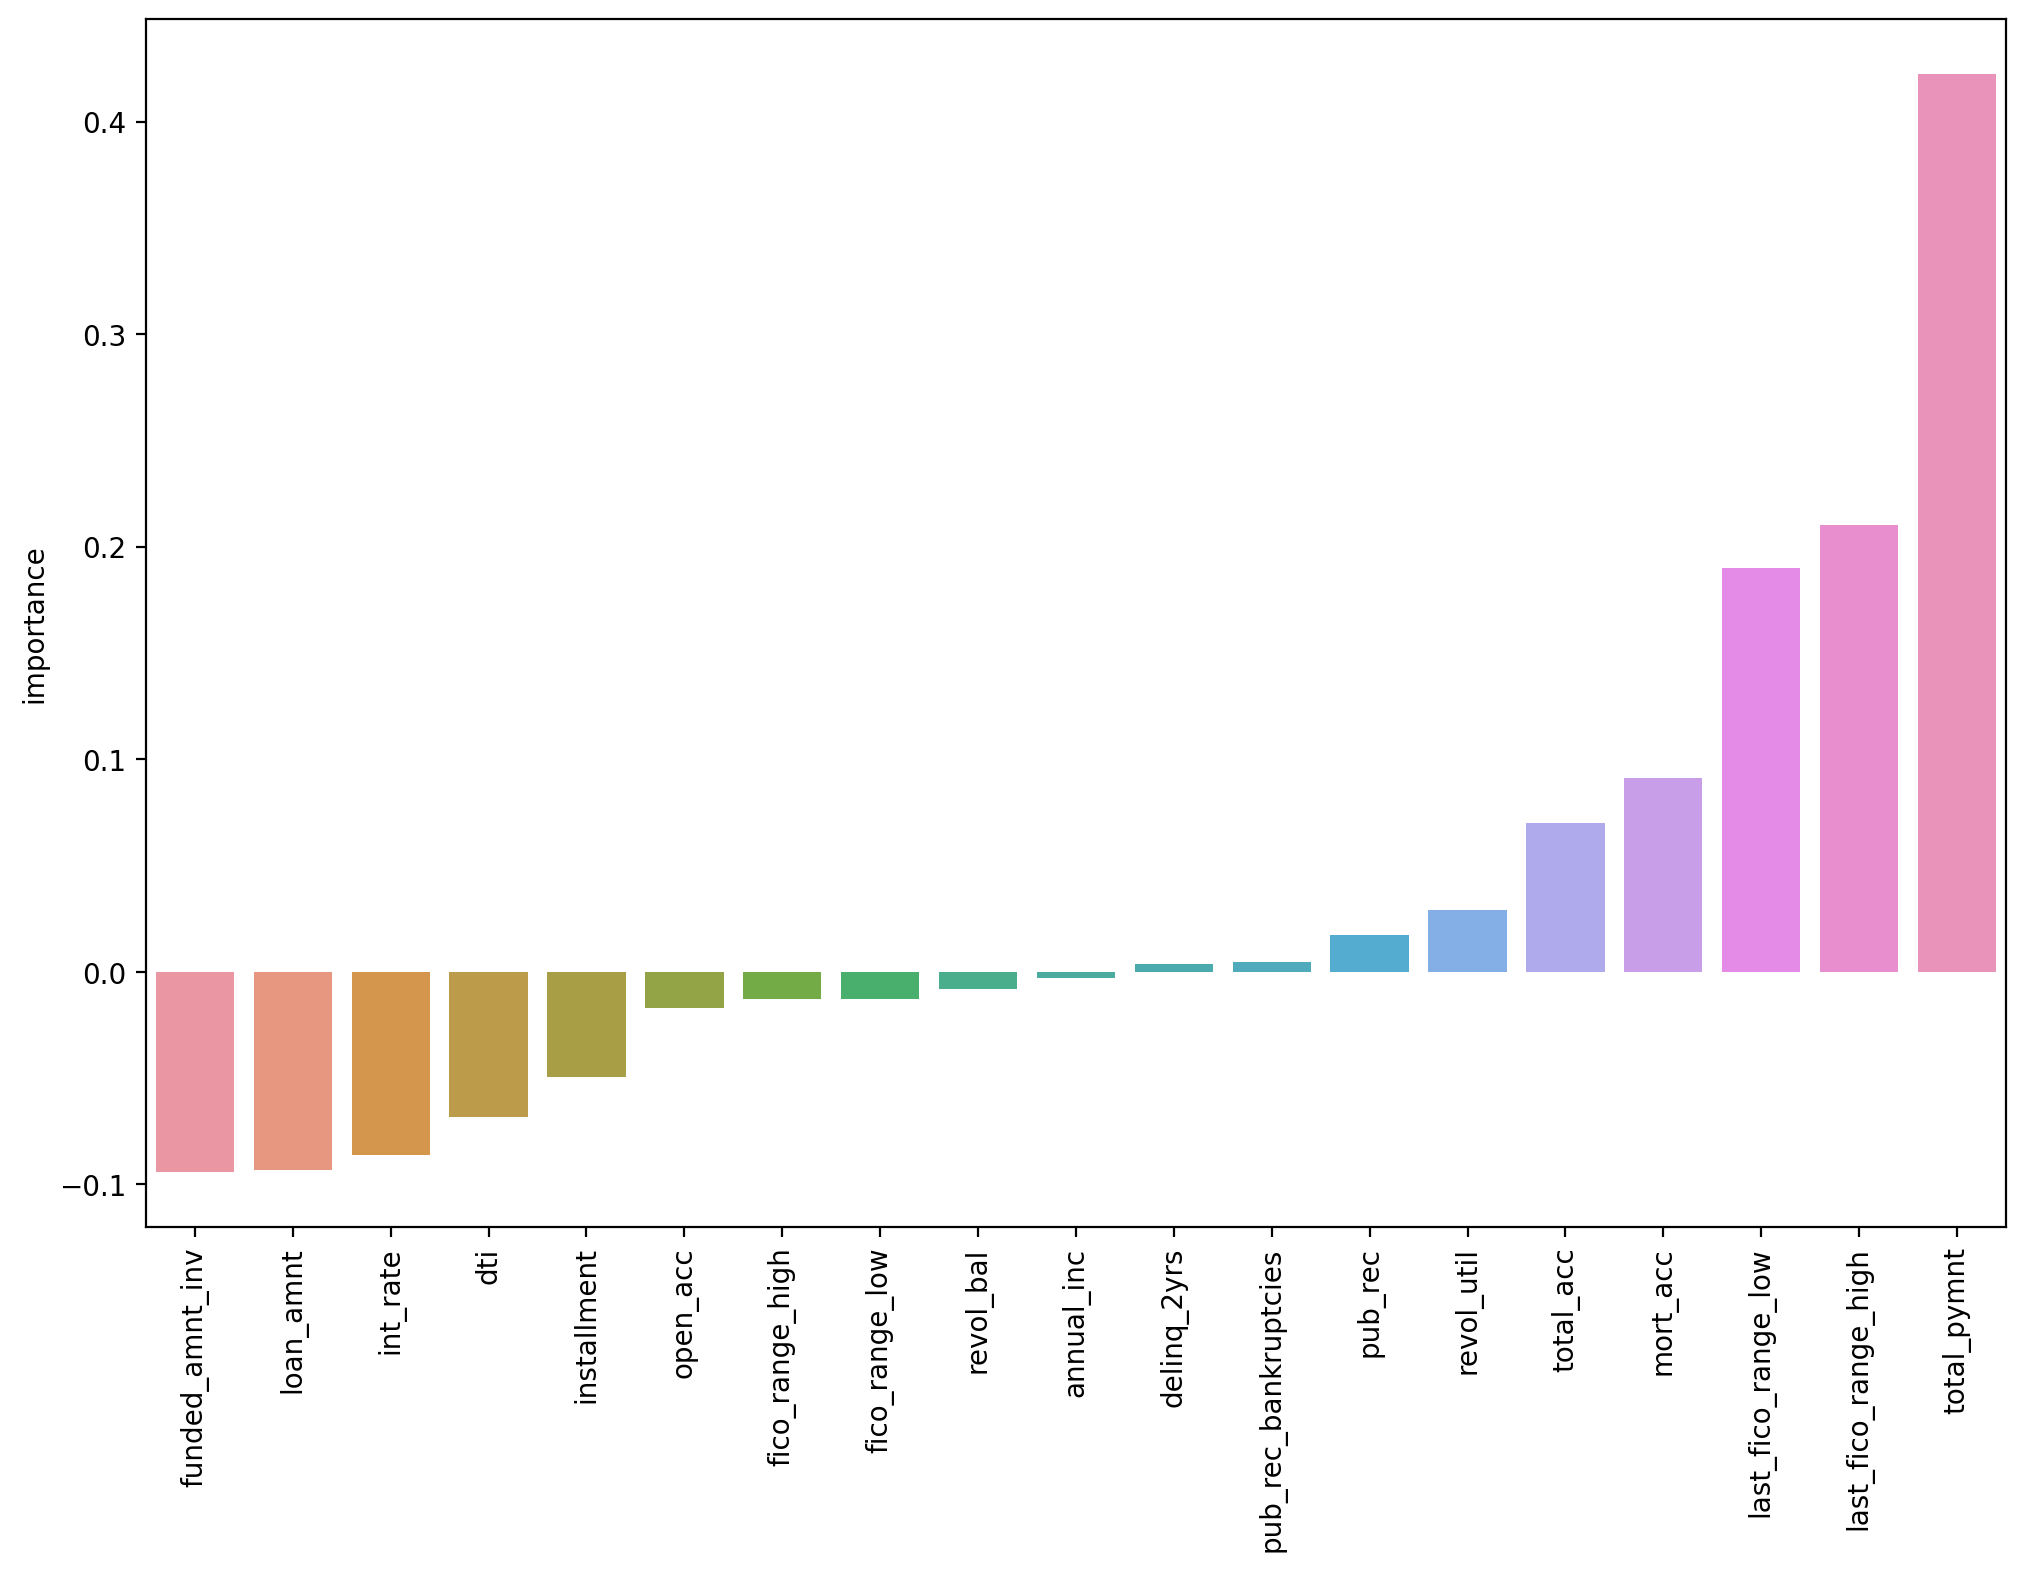

In [85]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(data=feat_imp, x=feat_imp.index, y='importance')
plt.xticks(rotation=90);

In [86]:
feat_info('total_pymnt')

Payments received to date for total amount funded


total_pymnt will be a very important feature when determining if current customers fully pay off their loan

In [87]:
feat_info('grade')

LC assigned loan grade


In [88]:
feat_info('sub_grade')

LC assigned loan subgrade


<AxesSubplot:xlabel='grade', ylabel='count'>

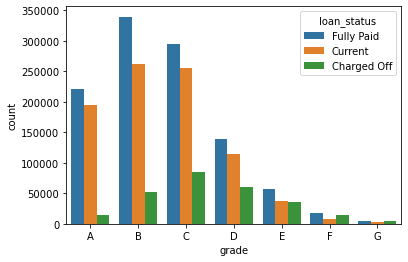

In [89]:
sns.countplot(data=df, x='grade', hue='loan_status', order=sorted(df['grade'].unique()))

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

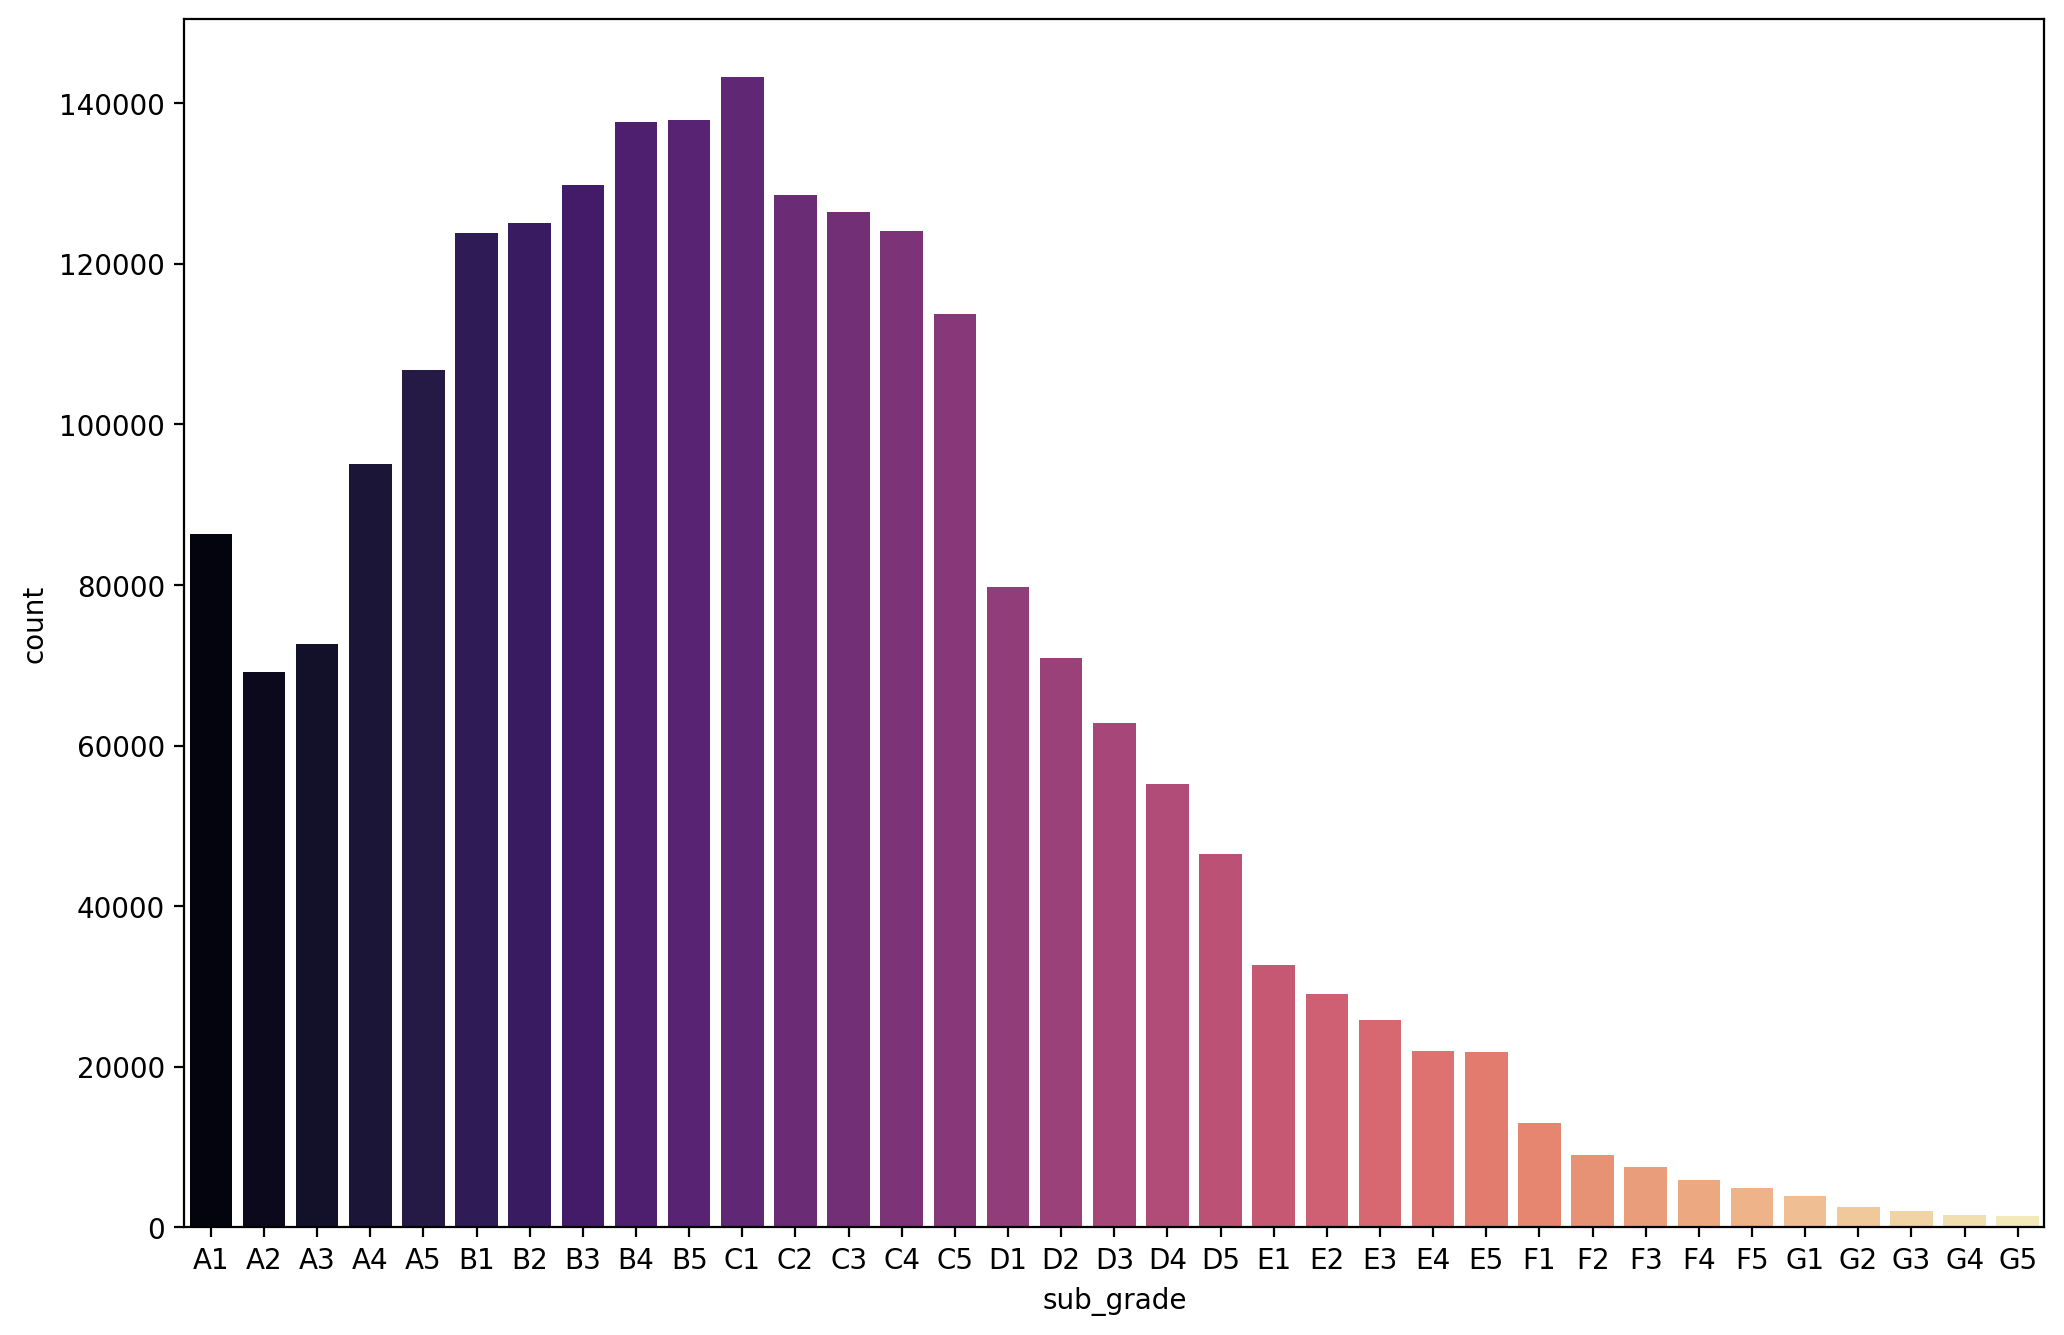

In [90]:
plt.figure(figsize=(12,8), dpi=200)
sns.countplot(data=df, x='sub_grade', order=sorted(df['sub_grade'].unique()), palette='magma')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

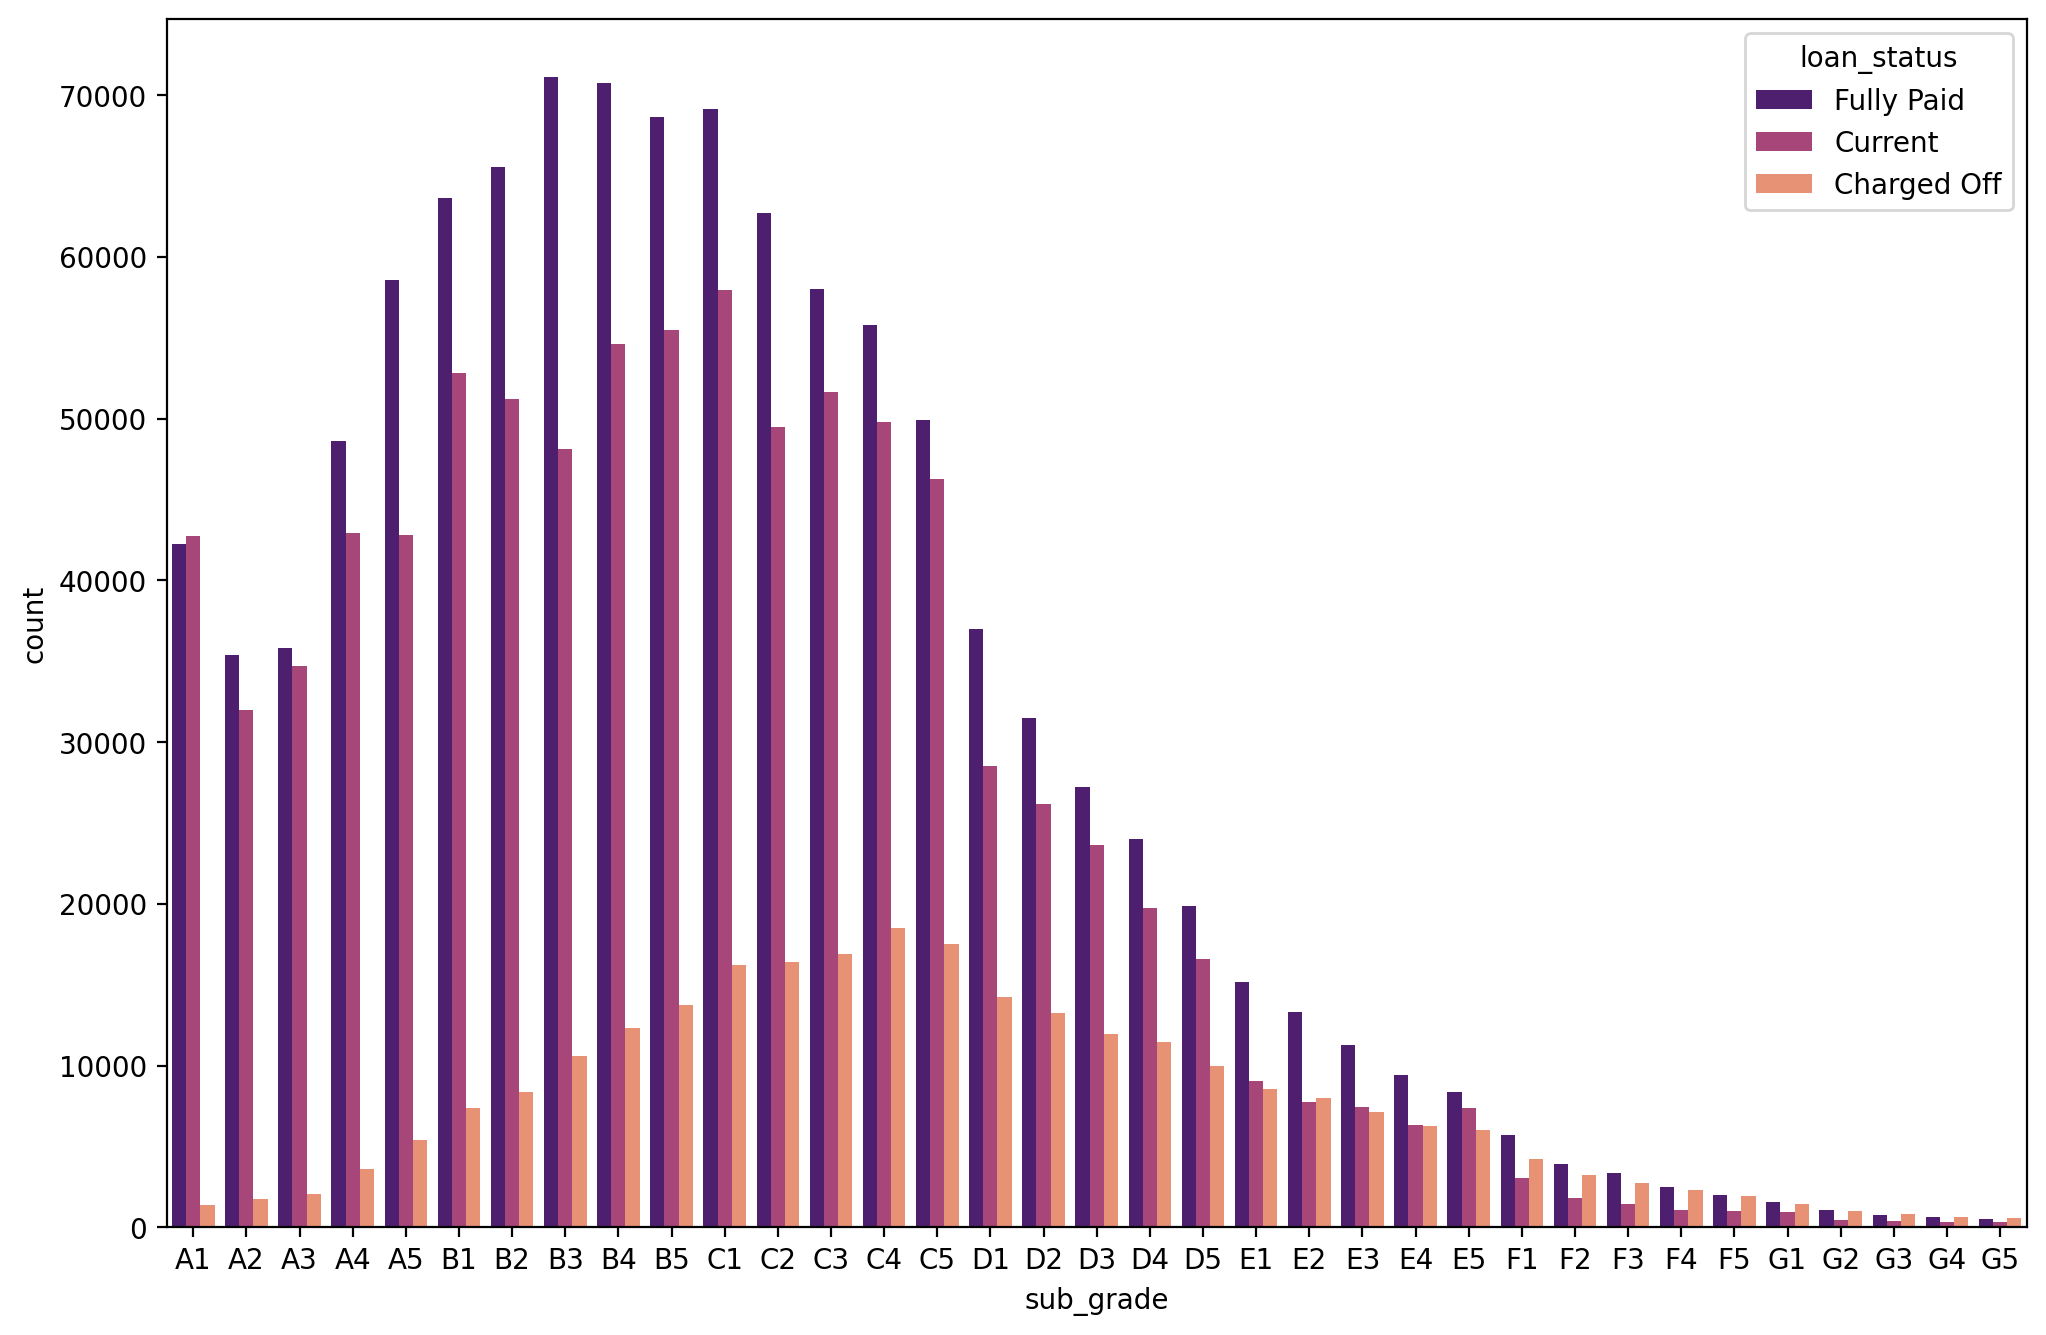

In [91]:
plt.figure(figsize=(12,8), dpi=200)
sns.countplot(data=df, x='sub_grade', order=sorted(df['sub_grade'].unique()), palette='magma', hue='loan_status')

It almost looks like grades F and G almost never gets paid back

In [97]:
df_FG = df[(df['grade'] == 'F') | (df['grade'] == 'G')]

In [98]:
df_FG = df_FG[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]

C:\Users\kaile\AppData\Local\Temp/ipykernel_3600/3017372844.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_FG = df_FG[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

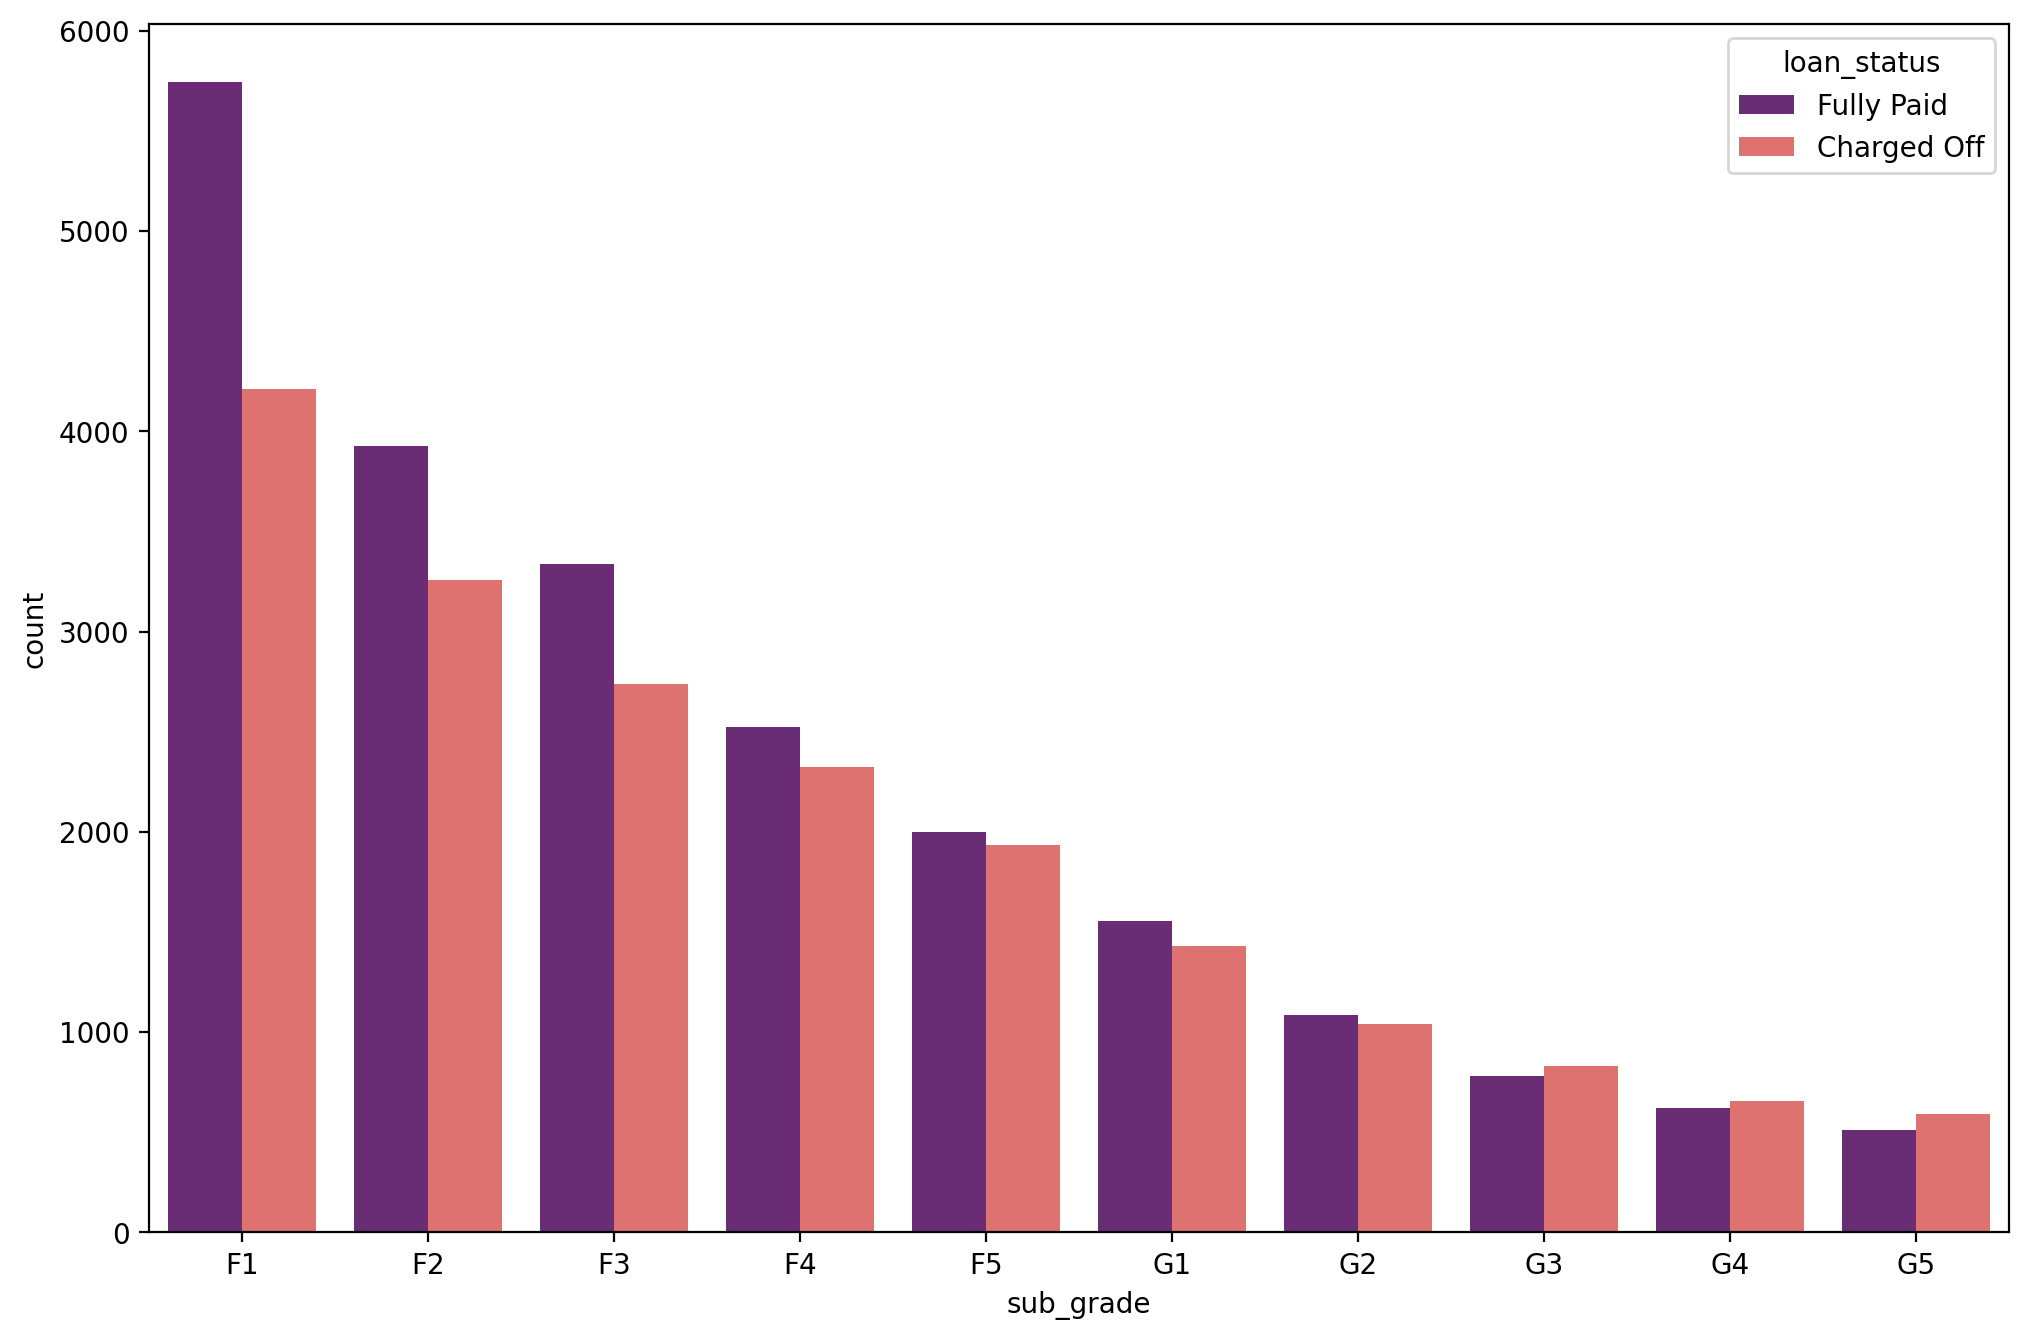

In [99]:
plt.figure(figsize=(12,8), dpi=200)
sns.countplot(data=df_FG, x='sub_grade', order=sorted(df_FG['sub_grade'].unique()), palette='magma', hue='loan_status')

Since sub_grade gives us a more fine grain picture, we will go ahead and drop grade

In [100]:
df = df.drop('grade', axis=1)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219536 entries, 0 to 2260698
Data columns (total 32 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   funded_amnt_inv       float64
 2   term                  object 
 3   int_rate              float64
 4   installment           float64
 5   sub_grade             object 
 6   home_ownership        object 
 7   annual_inc            float64
 8   verification_status   object 
 9   issue_d               object 
 10  loan_status           object 
 11  purpose               object 
 12  zip_code              object 
 13  addr_state            object 
 14  dti                   float64
 15  delinq_2yrs           float64
 16  earliest_cr_line      object 
 17  fico_range_low        float64
 18  fico_range_high       float64
 19  open_acc              float64
 20  pub_rec               float64
 21  revol_bal             float64
 22  revol_util            float64
 23  total_a

In [102]:
feat_info('issue_d')

The month which the loan was funded


This is a problem, we are trying to predict based on a feature set whether should we extend a loan to a customer. This basically tells us when the loan was handed out to a customer. we will go ahead and drop this column.

Knowing which month the loan was funded is also not helpful in determining whether or not a current customer will fully pay it off or incur a charge off

In [103]:
df = df.drop('issue_d', axis=1)

In [104]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [105]:
df['earliest_cr_line']

0          Aug-2003
1          Dec-1999
2          Aug-2000
3          Sep-2008
4          Jun-1998
             ...   
2260694    Dec-1999
2260695    Feb-1991
2260696    Feb-1995
2260697    Jul-1999
2260698    Jun-1996
Name: earliest_cr_line, Length: 2219536, dtype: object

This is an object, we will convert this to the year the credit line was first open

In [106]:
df['date'] = pd.to_datetime(df['earliest_cr_line'])

In [107]:
df['year'] = df['date'].apply(lambda value: value.year)

In [108]:
df['year']

0          2003
1          1999
2          2000
3          2008
4          1998
           ... 
2260694    1999
2260695    1991
2260696    1995
2260697    1999
2260698    1996
Name: year, Length: 2219536, dtype: int64

In [109]:
df = df.drop('earliest_cr_line', axis=1)

In [110]:
df = df.drop('date', axis=1)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219536 entries, 0 to 2260698
Data columns (total 31 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   funded_amnt_inv       float64
 2   term                  object 
 3   int_rate              float64
 4   installment           float64
 5   sub_grade             object 
 6   home_ownership        object 
 7   annual_inc            float64
 8   verification_status   object 
 9   loan_status           object 
 10  purpose               object 
 11  zip_code              object 
 12  addr_state            object 
 13  dti                   float64
 14  delinq_2yrs           float64
 15  fico_range_low        float64
 16  fico_range_high       float64
 17  open_acc              float64
 18  pub_rec               float64
 19  revol_bal             float64
 20  revol_util            float64
 21  total_acc             float64
 22  initial_list_status   object 
 23  total_p

In [112]:
df[['fico_range_low', 'fico_range_high']]

,fico_range_low,fico_range_high
0,675.0,679.0
1,715.0,719.0
2,695.0,699.0
3,785.0,789.0
4,695.0,699.0
...,...,...
2260694,665.0,669.0
2260695,695.0,699.0
2260696,705.0,709.0
2260697,660.0,664.0


coming back to the earlier plot where we look at feature importance relative to being able to predict a customer being able to fully pay of their loan

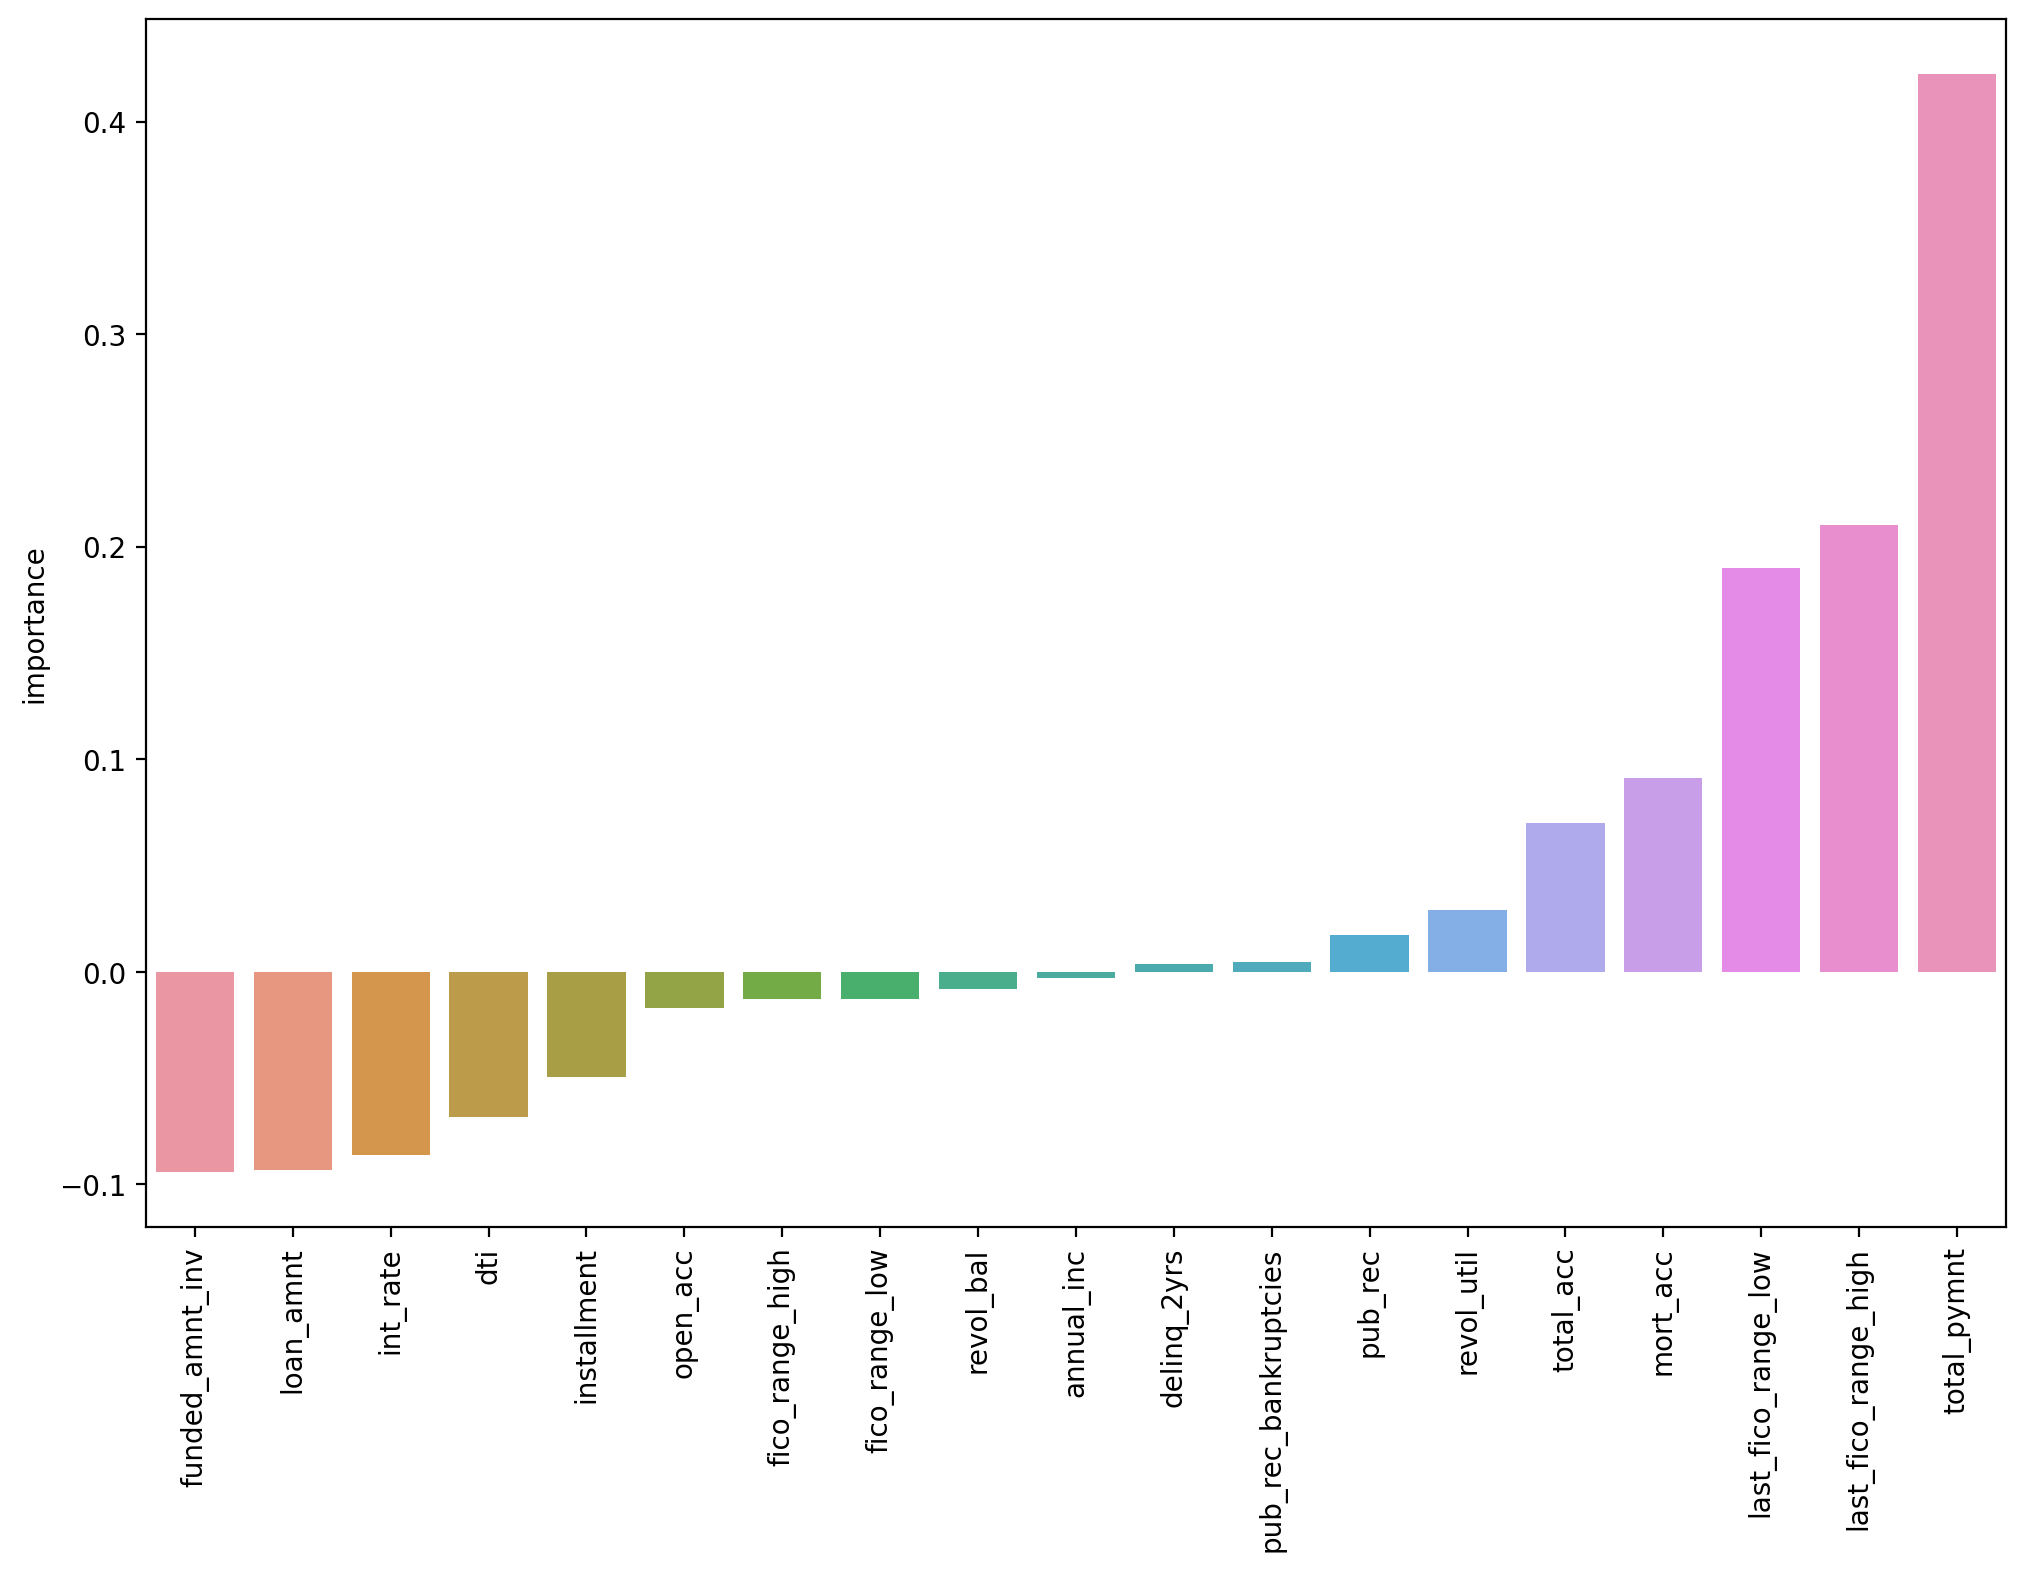

In [113]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(data=feat_imp, x=feat_imp.index, y='importance')
plt.xticks(rotation=90);

Based on the plot, we will go ahead and drop last_fico_range_low and fico_range_low. Since they are extremely similar to their counterpart last_fico_range_high and fico_range_high

In [114]:
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'sub_grade', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_pymnt', 'last_fico_range_high',
       'last_fico_range_low', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'label', 'year'],
      dtype='object')

In [115]:
df = df.drop('last_fico_range_low', axis=1)

In [116]:
df = df.drop('fico_range_low', axis=1)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219536 entries, 0 to 2260698
Data columns (total 29 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   funded_amnt_inv       float64
 2   term                  object 
 3   int_rate              float64
 4   installment           float64
 5   sub_grade             object 
 6   home_ownership        object 
 7   annual_inc            float64
 8   verification_status   object 
 9   loan_status           object 
 10  purpose               object 
 11  zip_code              object 
 12  addr_state            object 
 13  dti                   float64
 14  delinq_2yrs           float64
 15  fico_range_high       float64
 16  open_acc              float64
 17  pub_rec               float64
 18  revol_bal             float64
 19  revol_util            float64
 20  total_acc             float64
 21  initial_list_status   object 
 22  total_pymnt           float64
 23  last_fi

In [118]:
pd.set_option('max_columns', None)
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,last_fico_range_high,application_type,mort_acc,pub_rec_bankruptcies,label,year
0,3600.0,3600.0,36 months,13.99,123.03,C4,MORTGAGE,55000.0,Not Verified,Fully Paid,debt_consolidation,190xx,PA,5.91,0.0,679.0,7.0,0.0,2765.0,29.7,13.0,w,4421.723917,564.0,Individual,1.0,0.0,1,2003
1,24700.0,24700.0,36 months,11.99,820.28,C1,MORTGAGE,65000.0,Not Verified,Fully Paid,small_business,577xx,SD,16.06,1.0,719.0,22.0,0.0,21470.0,19.2,38.0,w,25679.660000,699.0,Individual,4.0,0.0,1,1999
2,20000.0,20000.0,60 months,10.78,432.66,B4,MORTGAGE,63000.0,Not Verified,Fully Paid,home_improvement,605xx,IL,10.78,0.0,699.0,6.0,0.0,7869.0,56.2,18.0,w,22705.924294,704.0,Joint App,5.0,0.0,1,2000
3,35000.0,35000.0,60 months,14.85,829.90,C5,MORTGAGE,110000.0,Source Verified,Current,debt_consolidation,076xx,NJ,17.06,0.0,789.0,13.0,0.0,7802.0,11.6,17.0,w,31464.010000,679.0,Individual,1.0,0.0,0,2008
4,10400.0,10400.0,60 months,22.45,289.91,F1,MORTGAGE,104433.0,Source Verified,Fully Paid,major_purchase,174xx,PA,25.37,1.0,699.0,12.0,0.0,21929.0,64.5,35.0,w,11740.500000,704.0,Individual,6.0,0.0,1,1998


In [119]:
pd.reset_option('max_columns')

In [120]:
feat_info('initial_list_status')

The initial listing status of the loan. Possible values are  W, F


In [121]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

The description from the dictionary wasn't very clear. I manage to do a web search and found a better description for initial_list_status.

Finally, the qualitative, categorical variable ‘initial listing status’ represents the listing status
of the loan at the time of approving and listing the loan. The variable can take two values, ‘f’
and ‘w’, where ‘f’ represents a listing status ‘fractional’, and ‘w’ a listing status ‘whole’. A
fractional loan can be funded by multiple investors on the platform whereas a loan with a
listing status ‘whole’ can only be fully funded by one investor.



In [122]:
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'sub_grade', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'fico_range_high', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_pymnt',
       'last_fico_range_high', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'label', 'year'],
      dtype='object')

<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

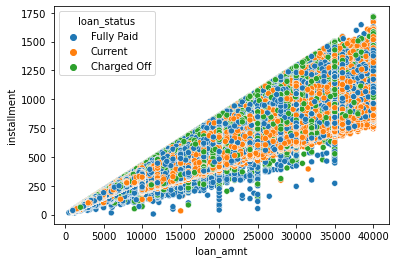

In [123]:
sns.scatterplot(data=df, x='loan_amnt', y='installment', hue='loan_status')

<AxesSubplot:xlabel='last_fico_range_high', ylabel='loan_amnt'>

C:\Users\kaile\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


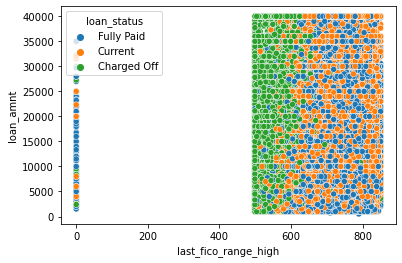

In [124]:
sns.scatterplot(data=df, x = 'last_fico_range_high' ,y='loan_amnt', hue='loan_status')

<AxesSubplot:xlabel='fico_range_high', ylabel='loan_amnt'>

C:\Users\kaile\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


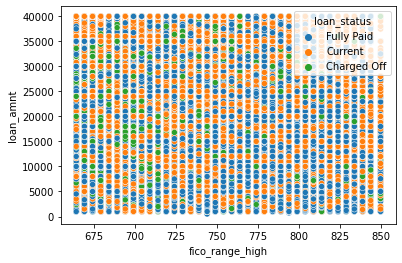

In [125]:
sns.scatterplot(data=df, x = 'fico_range_high' ,y='loan_amnt', hue='loan_status')

In [126]:
df['fico_range_high'].min()

664.0

In [127]:
df['last_fico_range_high'].min()

0.0

In [128]:
df[df['last_fico_range_high'] == 0]['loan_status'].value_counts()

Fully Paid     184
Charged Off     24
Current         22
Name: loan_status, dtype: int64

In [129]:
len(df[df['last_fico_range_high'] < df['fico_range_high']])

1078753

In [130]:
len(df[df['last_fico_range_high'] > df['fico_range_high']])

1026661

The number of people who had their fico score drop and the number of people who had their fico score increase is roughly close to 50:50. since only 230 people are missing their last_fico_range_high scores, we will use fico_range_high to replace those missing values

In [131]:
index = df[df['last_fico_range_high'] == 0].index

In [132]:
index

Int64Index([   2821,   23249,   43903,   70156,   82296,  110260,  126971,
             134441,  139744,  153191,
            ...
            2031173, 2040811, 2084564, 2087310, 2106153, 2117314, 2167881,
            2193859, 2202684, 2257286],
           dtype='int64', length=230)

In [133]:
df['last_fico_range_high'][index]

2821       0.0
23249      0.0
43903      0.0
70156      0.0
82296      0.0
          ... 
2117314    0.0
2167881    0.0
2193859    0.0
2202684    0.0
2257286    0.0
Name: last_fico_range_high, Length: 230, dtype: float64

In [134]:
df['last_fico_range_high'][index] = df['fico_range_high'][index]

C:\Users\kaile\AppData\Local\Temp/ipykernel_3600/2612548234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_fico_range_high'][index] = df['fico_range_high'][index]


In [135]:
df['last_fico_range_high'][index]

2821       669.0
23249      669.0
43903      669.0
70156      789.0
82296      664.0
           ...  
2117314    674.0
2167881    679.0
2193859    694.0
2202684    664.0
2257286    664.0
Name: last_fico_range_high, Length: 230, dtype: float64

<AxesSubplot:xlabel='last_fico_range_high', ylabel='loan_amnt'>

C:\Users\kaile\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


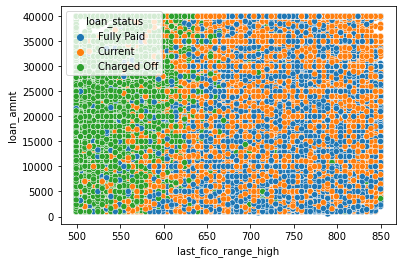

In [136]:
sns.scatterplot(data=df, x = 'last_fico_range_high' ,y='loan_amnt', hue='loan_status')

In [145]:
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'sub_grade', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'fico_range_high', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_pymnt',
       'last_fico_range_high', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'label', 'year'],
      dtype='object')

In [137]:
feat_info('pub_rec_bankruptcies')

Number of public record bankruptcies


<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='loan_amnt'>

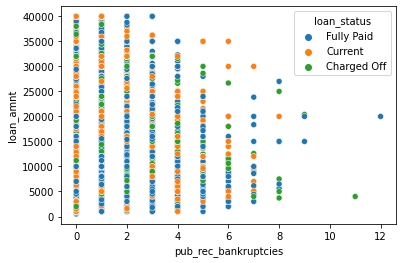

In [138]:
sns.scatterplot(data=df, x = 'pub_rec_bankruptcies' ,y='loan_amnt', hue='loan_status')

<AxesSubplot:xlabel='mort_acc', ylabel='loan_amnt'>

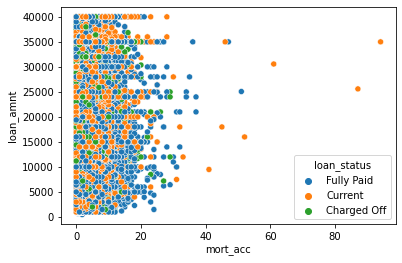

In [139]:
sns.scatterplot(data=df, x = 'mort_acc' ,y='loan_amnt', hue='loan_status')

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219536 entries, 0 to 2260698
Data columns (total 29 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   funded_amnt_inv       float64
 2   term                  object 
 3   int_rate              float64
 4   installment           float64
 5   sub_grade             object 
 6   home_ownership        object 
 7   annual_inc            float64
 8   verification_status   object 
 9   loan_status           object 
 10  purpose               object 
 11  zip_code              object 
 12  addr_state            object 
 13  dti                   float64
 14  delinq_2yrs           float64
 15  fico_range_high       float64
 16  open_acc              float64
 17  pub_rec               float64
 18  revol_bal             float64
 19  revol_util            float64
 20  total_acc             float64
 21  initial_list_status   object 
 22  total_pymnt           float64
 23  last_fi

In [141]:
df['application_type'].unique()

array(['Individual', 'Joint App'], dtype=object)

<AxesSubplot:xlabel='application_type', ylabel='count'>

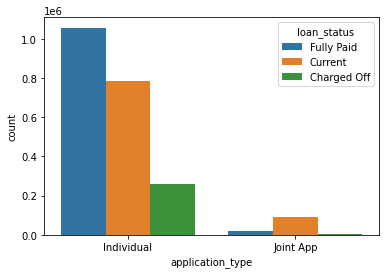

In [142]:
sns.countplot(data=df, x ='application_type', hue='loan_status')

In [143]:
df[df['loan_status'] == 'Charged Off']['application_type'].value_counts()

Individual    261931
Joint App       6259
Name: application_type, dtype: int64

In [144]:
df['application_type'].value_counts()

Individual    2104519
Joint App      115017
Name: application_type, dtype: int64

In [149]:
df[df['loan_status'] == 'Charged Off']['application_type'].value_counts()/df['application_type'].value_counts()

Individual    0.124461
Joint App     0.054418
Name: application_type, dtype: float64

In [146]:
Series = df[df['loan_status'] == 'Charged Off']['application_type'].value_counts()/df['application_type'].value_counts()

In [147]:
Series = pd.DataFrame(data=Series.values, index=Series.index, columns=['% Charged Off - application_type'])

<AxesSubplot:ylabel='% Charged Off - application_type'>

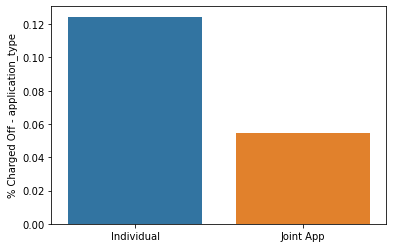

In [148]:
sns.barplot(data=Series, x=Series.index, y='% Charged Off - application_type')

We will keep application_type since it looks like Individual does have a bit more Charged Offs than joint App

In [150]:
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'sub_grade', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'fico_range_high', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_pymnt',
       'last_fico_range_high', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'label', 'year'],
      dtype='object')

<AxesSubplot:xlabel='total_pymnt', ylabel='loan_amnt'>

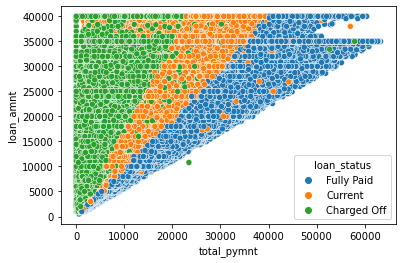

In [151]:
sns.scatterplot(data=df, x = 'total_pymnt' ,y='loan_amnt', hue='loan_status')

There seem to be an outlier where total_pymnt is between 25000 and 22000 and loan_amnt is between 11000 and 9000

In [152]:
df[(df['total_pymnt'] < 25000) & (df['total_pymnt'] > 22000) & (df['loan_amnt'] < 11000) & (df['loan_amnt'] > 9000)]

,loan_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,...,revol_util,total_acc,initial_list_status,total_pymnt,last_fico_range_high,application_type,mort_acc,pub_rec_bankruptcies,label,year
2258284,10800.0,10800.0,36 months,19.99,401.32,D4,OWN,54559.0,Verified,Charged Off,...,0.0,11.0,w,23439.24,794.0,Individual,1.0,0.0,0,2007


we will remove this row

In [153]:
df = df.drop(2258284)

<AxesSubplot:xlabel='total_acc', ylabel='loan_amnt'>

C:\Users\kaile\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


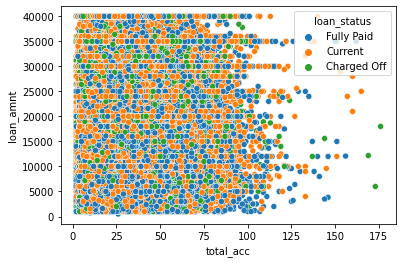

In [154]:
sns.scatterplot(data=df, x = 'total_acc' ,y='loan_amnt', hue='loan_status')

<AxesSubplot:xlabel='revol_util', ylabel='loan_amnt'>

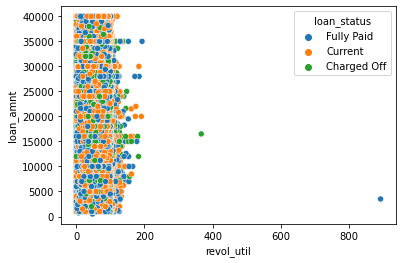

In [155]:
sns.scatterplot(data=df, x = 'revol_util' ,y='loan_amnt', hue='loan_status')

In [156]:
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


Your credit utilization rate, sometimes called your credit utilization ratio, is the amount of revolving credit you're currently using divided by the total amount of revolving credit you have available. In other words, it's how much you currently owe divided by your credit limit. It is generally expressed as a percent.

In [158]:
pd.set_option('max_columns', None)
df[df['revol_util'] > 350]

,loan_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,last_fico_range_high,application_type,mort_acc,pub_rec_bankruptcies,label,year
1254597,16500.0,16500.0,60 months,14.49,388.14,C4,MORTGAGE,48000.0,Source Verified,Charged Off,debt_consolidation,284xx,NC,9.33,0.0,719.0,4.0,0.0,2566.0,366.6,15.0,f,6986.52,739.0,Individual,0.0,0.0,0,1996
1292903,3500.0,3500.0,36 months,12.49,117.08,B4,RENT,45000.0,Verified,Fully Paid,debt_consolidation,918xx,CA,14.67,0.0,699.0,2.0,0.0,2677.0,892.3,9.0,f,3944.66,659.0,Individual,0.0,0.0,1,1998


It is remarkable that someone with such a high revol_util manage to pay off their loan. However, both of them are such outliers that we will remove them

In [159]:
pd.reset_option('max_columns')

In [160]:
df = df.drop(1254597)

In [161]:
df = df.drop(1292903)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219533 entries, 0 to 2260698
Data columns (total 29 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   funded_amnt_inv       float64
 2   term                  object 
 3   int_rate              float64
 4   installment           float64
 5   sub_grade             object 
 6   home_ownership        object 
 7   annual_inc            float64
 8   verification_status   object 
 9   loan_status           object 
 10  purpose               object 
 11  zip_code              object 
 12  addr_state            object 
 13  dti                   float64
 14  delinq_2yrs           float64
 15  fico_range_high       float64
 16  open_acc              float64
 17  pub_rec               float64
 18  revol_bal             float64
 19  revol_util            float64
 20  total_acc             float64
 21  initial_list_status   object 
 22  total_pymnt           float64
 23  last_fi

In [163]:
feat_info('revol_bal')

Total credit revolving balance


<AxesSubplot:xlabel='revol_bal', ylabel='loan_amnt'>

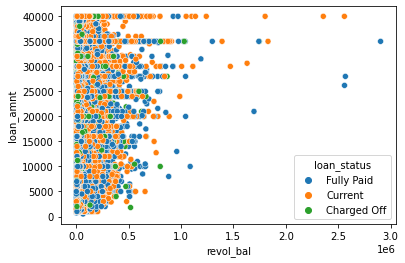

In [164]:
sns.scatterplot(data=df, x = 'revol_bal' ,y='loan_amnt', hue='loan_status')

In [165]:
feat_info('pub_rec')

Number of derogatory public records


<AxesSubplot:xlabel='pub_rec', ylabel='loan_amnt'>

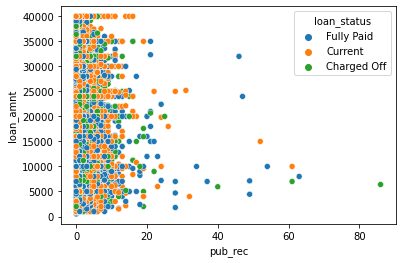

In [166]:
sns.scatterplot(data=df, x = 'pub_rec' ,y='loan_amnt', hue='loan_status')

<AxesSubplot:xlabel='open_acc', ylabel='loan_amnt'>

C:\Users\kaile\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


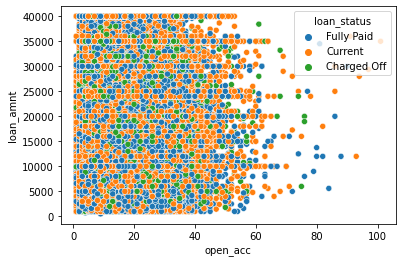

In [167]:
sns.scatterplot(data=df, x = 'open_acc' ,y='loan_amnt', hue='loan_status')

In [176]:
feat_info('delinq_2yrs')

The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years


<AxesSubplot:xlabel='delinq_2yrs', ylabel='loan_amnt'>

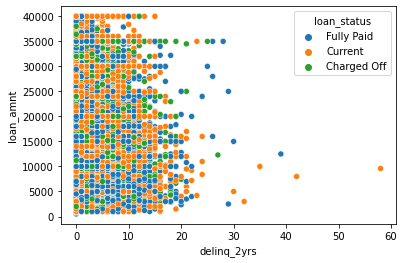

In [168]:
sns.scatterplot(data=df, x = 'delinq_2yrs' ,y='loan_amnt', hue='loan_status')

In [177]:
feat_info('dti')

A ratio calculated using the borrowers total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrowers self-reported monthly income.


<AxesSubplot:xlabel='dti', ylabel='loan_amnt'>

C:\Users\kaile\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


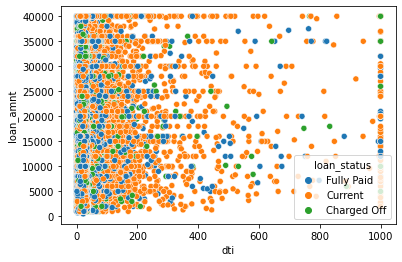

In [169]:
sns.scatterplot(data=df, x = 'dti' ,y='loan_amnt', hue='loan_status')

In [175]:
feat_info('annual_inc')

The self-reported annual income provided by the borrower during registration.


<AxesSubplot:xlabel='annual_inc', ylabel='loan_amnt'>

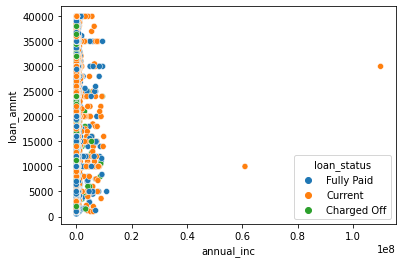

In [170]:
sns.scatterplot(data=df, x = 'annual_inc' ,y='loan_amnt', hue='loan_status')

In [178]:
df['annual_inc'].max()

110000000.0

In [180]:
df[df['annual_inc'] > 40000000]

,loan_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,...,revol_util,total_acc,initial_list_status,total_pymnt,last_fico_range_high,application_type,mort_acc,pub_rec_bankruptcies,label,year
601128,30000.0,30000.0,60 months,9.93,636.38,B2,RENT,110000000.0,Verified,Current,...,83.5,13.0,w,12182.25,694.0,Individual,0.0,0.0,0,1994
1673140,10000.0,10000.0,36 months,11.44,329.48,B4,MORTGAGE,61000000.0,Source Verified,Current,...,35.1,6.0,w,7917.88,669.0,Individual,0.0,0.0,0,1996


People self reported making 110 or 61 million a year taking out a 30 k or 10 k loan? Maybe there is a correlation to bogus self reported income levels and loan status. However, because these two values are so skewed, when we scale them, it will squish all the over values. we will drop these 2 values

In [181]:
df = df.drop(601128)

In [182]:
df = df.drop(1673140)

<AxesSubplot:xlabel='annual_inc', ylabel='loan_amnt'>

C:\Users\kaile\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


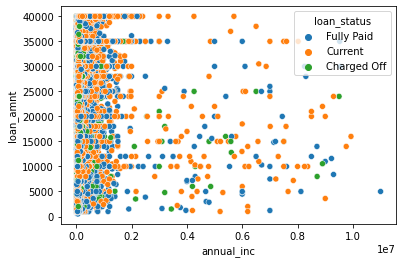

In [183]:
sns.scatterplot(data=df, x = 'annual_inc' ,y='loan_amnt', hue='loan_status')

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

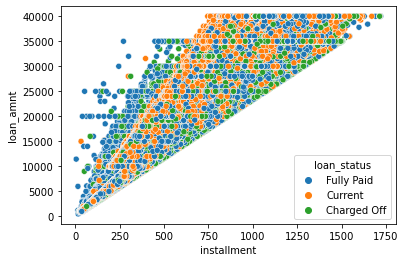

In [171]:
sns.scatterplot(data=df, x = 'installment' ,y='loan_amnt', hue='loan_status')

<AxesSubplot:xlabel='int_rate', ylabel='loan_amnt'>

C:\Users\kaile\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


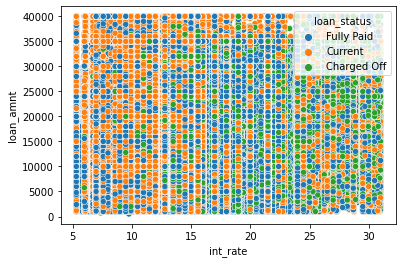

In [172]:
sns.scatterplot(data=df, x = 'int_rate' ,y='loan_amnt', hue='loan_status')

<AxesSubplot:xlabel='funded_amnt_inv', ylabel='loan_amnt'>

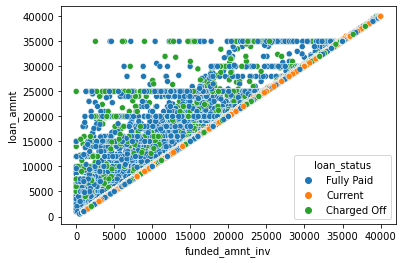

In [173]:
sns.scatterplot(data=df, x = 'funded_amnt_inv' ,y='loan_amnt', hue='loan_status')

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219533 entries, 0 to 2260698
Data columns (total 29 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   funded_amnt_inv       float64
 2   term                  object 
 3   int_rate              float64
 4   installment           float64
 5   sub_grade             object 
 6   home_ownership        object 
 7   annual_inc            float64
 8   verification_status   object 
 9   loan_status           object 
 10  purpose               object 
 11  zip_code              object 
 12  addr_state            object 
 13  dti                   float64
 14  delinq_2yrs           float64
 15  fico_range_high       float64
 16  open_acc              float64
 17  pub_rec               float64
 18  revol_bal             float64
 19  revol_util            float64
 20  total_acc             float64
 21  initial_list_status   object 
 22  total_pymnt           float64
 23  last_fi

In [184]:
df.to_csv('./DATA/lendingclub_preprocessed.csv')

In [185]:
len(df)

2219531